# Customer Lifetime Value (LTV) Prediction Project Summary

__This project aimed to build a robust machine learning model to predict Customer Lifetime Value, ensuring accuracy by meticulously handling data leakage and optimizing model complexity.__

__1.Data Loading and Initial Exploration*__

>We loaded the raw customer data and performed initial checks (like viewing head, info, and descriptive statistics) to understand its structure, identify data types, and spot any immediate quality issues.

In [295]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [297]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [299]:
df= pd.read_csv('C:/Users/sujee/Desktop/HFU Class Notes/Frey_Luxemburger/Project Data Set/digital_wallet_ltv_dataset.csv')
df.head()

Customer_ID  Age  Location Income_Level  Total_Transactions  \
0   cust_0000   54     Urban          Low                 192   
1   cust_0001   67  Suburban         High                 979   
2   cust_0002   44     Urban         High                 329   
3   cust_0003   30     Rural         High                  71   
4   cust_0004   58     Urban       Middle                 878   

   Avg_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value  \
0              16,736.38              60,216.83               6,525.81   
1              14,536.73              48,350.10               2,186.74   
2               7,061.37              32,521.16               2,743.41   
3              16,426.88              17,827.90               4,360.78   
4              10,800.09              17,497.63               4,532.87   

    Total_Spent  Active_Days  Last_Transaction_Days_Ago  \
0  3,213,385.73          140                        209   
1 14,231,463.25          229                        240   
2  2,323,191.65           73                         21   
3  1,166,308.23          299                        285   
4  9,482,481.36          236                        329   

   Loyalty_Points_Earned  Referral_Count  Cashback_Received  \
0                   2114              25           2,224.01   
1                   2960              20           4,026.82   
2                   3170               0           1,441.01   
3                   4756              35           4,365.86   
4                   1992              18           4,161.52   

  App_Usage_Frequency Preferred_Payment_Method  Support_Tickets_Raised  \
0             Monthly               Debit Card                       3   
1             Monthly                      UPI                      17   
2             Monthly               Debit Card                      11   
3              Weekly           Wallet Balance                       6   
4               Daily                      UPI                      18   

   Issue_Resolution_Time  Customer_Satisfaction_Score          LTV  
0                  61.57                            1   327,954.57  
1                  60.39                            8 1,437,052.91  
2                  45.31                            4   241,938.66  
3                  22.03                            1   128,459.90  
4                  20.63                            5   956,951.37

In [301]:
df.tail()

Customer_ID  Age  Location Income_Level  Total_Transactions  \
6995   cust_6995   68  Suburban         High                 340   
6996   cust_6996   62  Suburban         High                 647   
6997   cust_6997   16     Urban       Middle                 481   
6998   cust_6998   32     Urban         High                 574   
6999   cust_6999   17  Suburban       Middle                 825   

      Avg_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value  \
6995                 162.70                 606.00                  80.35   
6996               1,575.71               4,702.52                 359.51   
6997              14,429.36              17,207.74               1,510.60   
6998               8,005.03              33,203.80               1,976.33   
6999              15,697.67              50,584.16               7,833.23   

       Total_Spent  Active_Days  Last_Transaction_Days_Ago  \
6995     55,319.19           78                         20   
6996  1,019,483.00          271                        252   
6997  6,940,519.84          225                        348   
6998  4,594,885.60          121                         50   
6999 12,950,576.82          223                        189   

      Loyalty_Points_Earned  Referral_Count  Cashback_Received  \
6995                    521              32             654.22   
6996                   2972              40           3,574.86   
6997                   2423               8           2,899.07   
6998                    634              31           2,432.36   
6999                    648              12             638.25   

     App_Usage_Frequency Preferred_Payment_Method  Support_Tickets_Raised  \
6995             Monthly              Credit Card                      14   
6996             Monthly           Wallet Balance                      13   
6997             Monthly                      UPI                      12   
6998             Monthly              Credit Card                      11   
6999             Monthly              Credit Card                      17   

      Issue_Resolution_Time  Customer_Satisfaction_Score          LTV  
6995                   3.35                            3    12,446.81  
6996                  19.74                            3   113,104.87  
6997                  45.04                            2   700,248.45  
6998                  44.15                            1   463,640.38  
6999                  35.11                            1 1,298,234.56

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [305]:
df.describe()

Age  Total_Transactions  Avg_Transaction_Value  \
count 7,000.00            7,000.00               7,000.00   
mean     42.63              501.22               9,946.83   
std      15.52              286.28               5,780.88   
min      16.00                1.00                  10.19   
25%      29.00              252.00               4,907.47   
50%      43.00              506.00               9,841.17   
75%      56.00              744.00              14,955.05   
max      69.00            1,000.00              19,996.45   

       Max_Transaction_Value  Min_Transaction_Value   Total_Spent  \
count               7,000.00               7,000.00      7,000.00   
mean               30,159.60               2,981.55  5,002,021.88   
std                21,996.11               2,197.34  4,390,495.26   
min                    31.86                   4.62      1,498.14   
25%                12,224.33               1,233.07  1,363,990.76   
50%                25,469.39               2,473.18  3,756,104.93   
75%                44,515.41               4,378.76  7,645,507.72   
max                98,809.24               9,917.03 19,467,727.68   

       Active_Days  Last_Transaction_Days_Ago  Loyalty_Points_Earned  \
count     7,000.00                   7,000.00               7,000.00   
mean        181.93                     183.85               2,501.55   
std         105.10                     105.06               1,446.68   
min           1.00                       1.00                   0.00   
25%          90.00                      93.00               1,254.75   
50%         182.00                     184.00               2,466.00   
75%         273.00                     275.00               3,792.25   
max         365.00                     365.00               5,000.00   

       Referral_Count  Cashback_Received  Support_Tickets_Raised  \
count        7,000.00           7,000.00                7,000.00   
mean            24.84           2,496.53                   10.02   
std             14.56           1,440.65                    6.04   
min              0.00               0.23                    0.00   
25%             12.00           1,269.42                    5.00   
50%             25.00           2,478.94                   10.00   
75%             37.00           3,749.38                   15.00   
max             50.00           4,999.70                   20.00   

       Issue_Resolution_Time  Customer_Satisfaction_Score          LTV  
count               7,000.00                     7,000.00     7,000.00  
mean                   36.53                         5.48   511,919.72  
std                    20.39                         2.86   439,055.08  
min                     1.02                         1.00     3,770.50  
25%                    19.13                         3.00   148,205.83  
50%                    36.26                         5.00   387,818.00  
75%                    54.07                         8.00   774,857.83  
max                    71.98                        10.00 1,956,987.64

In [307]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64


In [309]:
# Set display format: show float numbers with thousand separators and two decimal places
pd.options.display.float_format = '{:,.2f}'.format

# Display the first 5 rows of 'Total_Spent' and 'LTV' columns with formatted numbers
df[['Total_Spent', 'LTV']].head()
df.head(5)

Customer_ID  Age  Location Income_Level  Total_Transactions  \
0   cust_0000   54     Urban          Low                 192   
1   cust_0001   67  Suburban         High                 979   
2   cust_0002   44     Urban         High                 329   
3   cust_0003   30     Rural         High                  71   
4   cust_0004   58     Urban       Middle                 878   

   Avg_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value  \
0              16,736.38              60,216.83               6,525.81   
1              14,536.73              48,350.10               2,186.74   
2               7,061.37              32,521.16               2,743.41   
3              16,426.88              17,827.90               4,360.78   
4              10,800.09              17,497.63               4,532.87   

    Total_Spent  Active_Days  Last_Transaction_Days_Ago  \
0  3,213,385.73          140                        209   
1 14,231,463.25          229                        240   
2  2,323,191.65           73                         21   
3  1,166,308.23          299                        285   
4  9,482,481.36          236                        329   

   Loyalty_Points_Earned  Referral_Count  Cashback_Received  \
0                   2114              25           2,224.01   
1                   2960              20           4,026.82   
2                   3170               0           1,441.01   
3                   4756              35           4,365.86   
4                   1992              18           4,161.52   

  App_Usage_Frequency Preferred_Payment_Method  Support_Tickets_Raised  \
0             Monthly               Debit Card                       3   
1             Monthly                      UPI                      17   
2             Monthly               Debit Card                      11   
3              Weekly           Wallet Balance                       6   
4               Daily                      UPI                      18   

   Issue_Resolution_Time  Customer_Satisfaction_Score          LTV  
0                  61.57                            1   327,954.57  
1                  60.39                            8 1,437,052.91  
2                  45.31                            4   241,938.66  
3                  22.03                            1   128,459.90  
4                  20.63                            5   956,951.37

In [311]:
#Check for duplicates
duplicates = df.duplicated()
print(f"Duplicate rows found: {duplicates.sum()}")

Duplicate rows found: 0


In [313]:
# Get value ranges for each column
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # For numerical columns
        col_min = round(df[column].min(), 2)
        col_max = round(df[column].max(), 2)
        print(f"{column}: Min = {col_min}, Max = {col_max}")
    elif df[column].dtype == 'object':  # For categorical columns
        print(f"{column}: {df[column].unique()}")

Customer_ID: ['cust_0000' 'cust_0001' 'cust_0002' ... 'cust_6997' 'cust_6998'
 'cust_6999']
Age: Min = 16, Max = 69
Location: ['Urban' 'Suburban' 'Rural']
Income_Level: ['Low' 'High' 'Middle']
Total_Transactions: Min = 1, Max = 1000
Avg_Transaction_Value: Min = 10.19, Max = 19996.45
Max_Transaction_Value: Min = 31.86, Max = 98809.24
Min_Transaction_Value: Min = 4.62, Max = 9917.03
Total_Spent: Min = 1498.14, Max = 19467727.68
Active_Days: Min = 1, Max = 365
Last_Transaction_Days_Ago: Min = 1, Max = 365
Loyalty_Points_Earned: Min = 0, Max = 5000
Referral_Count: Min = 0, Max = 50
Cashback_Received: Min = 0.23, Max = 4999.7
App_Usage_Frequency: ['Monthly' 'Weekly' 'Daily']
Preferred_Payment_Method: ['Debit Card' 'UPI' 'Wallet Balance' 'Credit Card']
Support_Tickets_Raised: Min = 0, Max = 20
Issue_Resolution_Time: Min = 1.02, Max = 71.98
Customer_Satisfaction_Score: Min = 1, Max = 10
LTV: Min = 3770.5, Max = 1956987.64


In [315]:
df.shape 

(7000, 20)

In [317]:
# Select only numeric columns (int and float types)
numerical_data = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = numerical_data.columns
numeric_cols

Index(['Age', 'Total_Transactions', 'Avg_Transaction_Value',
       'Max_Transaction_Value', 'Min_Transaction_Value', 'Total_Spent',
       'Active_Days', 'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned',
       'Referral_Count', 'Cashback_Received', 'Support_Tickets_Raised',
       'Issue_Resolution_Time', 'Customer_Satisfaction_Score', 'LTV'],
      dtype='object')

__Outlier Identification__

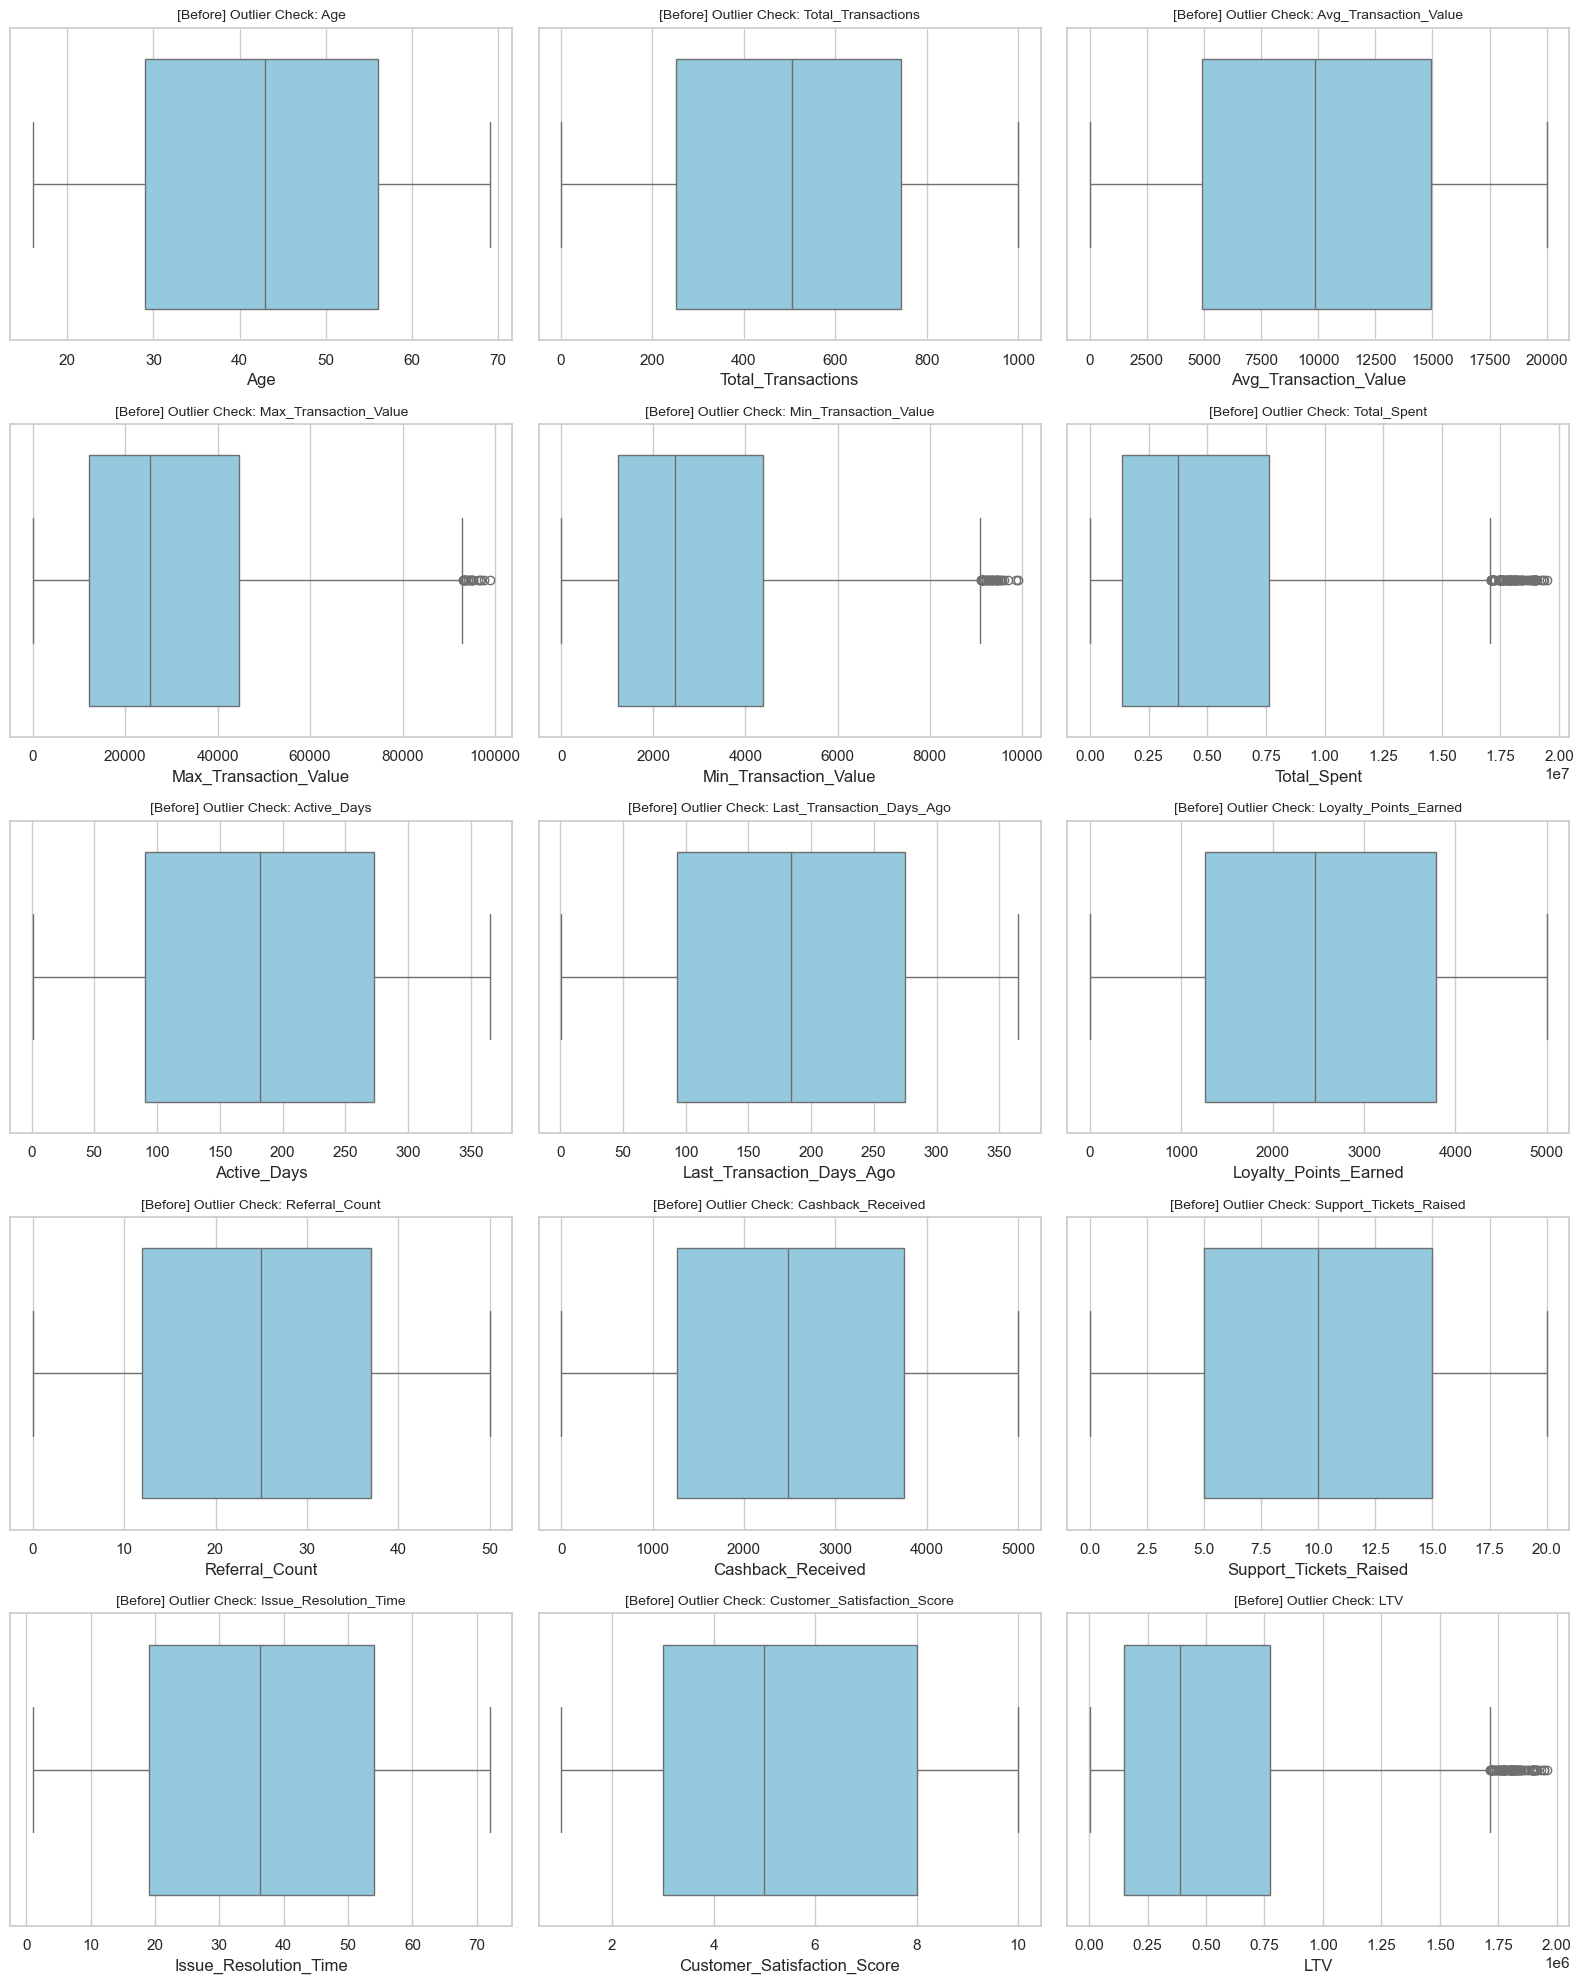

In [320]:
# --- STEP 1: Visualize outliers before removal ---
cols = 3  # Number of plots per row
rows = len(numeric_cols) // cols + (len(numeric_cols) % cols > 0)  # Manual ceiling

plt.figure(figsize=(16, rows * 4))  # Adjust figure height based on rows

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)  # Create subplot in a grid layout (rows x 2)
    sns.boxplot(x=df[col], color='skyblue')  # Boxplot for the column
    plt.title(f'[Before] Outlier Check: {col}', fontsize=10)
    plt.tight_layout()

plt.show()

In [321]:
# --- Identify columns with outliers ---
print("📊 Outlier Summary:")
outlier_cols = []

def get_iqr_bounds(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

for col in numeric_cols:
    low, high = get_iqr_bounds(df, col)
    outliers = df[(df[col] < low) | (df[col] > high)]
    if not outliers.empty:
        outlier_cols.append(col)
        print(f"{col}: {len(outliers)} rows ({len(outliers)/len(df)*100:.2f}%)")

📊 Outlier Summary:
Max_Transaction_Value: 19 rows (0.27%)
Min_Transaction_Value: 37 rows (0.53%)
Total_Spent: 86 rows (1.23%)
LTV: 86 rows (1.23%)


# 1.Data Visualization

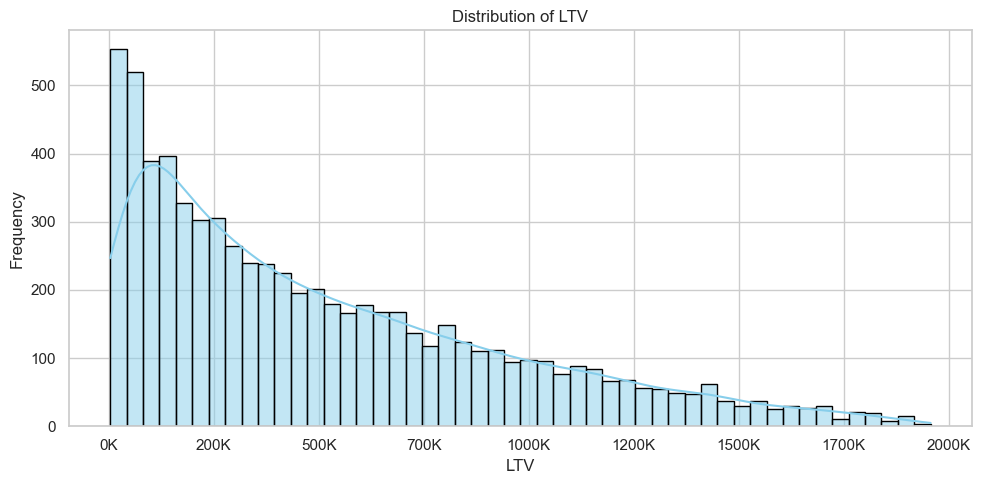

In [325]:
import matplotlib.ticker as mtick  # Brings in Matplotlib's tick formatting tools, custom axis labels (e.g., 200K, 50%)

# Distribution of Lifetime Value (LTV) - with custom x-axis labels
plt.figure(figsize=(10, 5))
sns.histplot(df['LTV'], kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of LTV')
plt.xlabel('LTV')
plt.ylabel('Frequency')

# Format x-axis in steps like 200K, 400K, etc.
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e5)*100}K'))

plt.grid(True)
plt.tight_layout()
plt.show()

__Correlation Matrix__

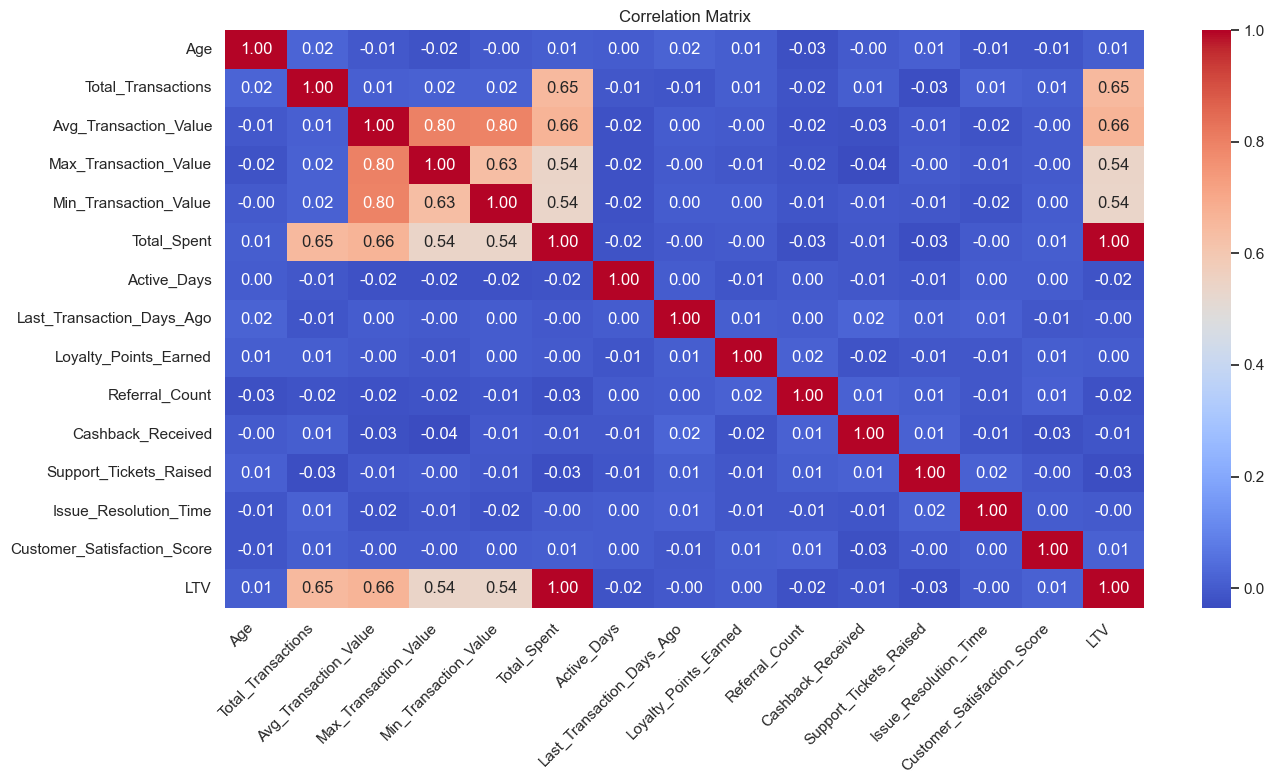

In [328]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
numerical_df = df.select_dtypes(include=np.number).drop(columns=['Customer_ID'], errors='ignore')
ax = sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')

# Rotate and align labels precisely
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# 2. Clustering

To support:
- **Personalized financial services**, and  
- **Optimize marketing strategies** to improve ROI and reduce churn,  

we applied clustering on key customer behavioral features. Also, we selected **7 features** that are **Valuable for business insights**:
> - `Total_Transactions`  
> - `Avg_Transaction_Value`  
> - `Total_Spent`  
> - `Max_Transaction_Value`  
> - `Min_Transaction_Value`  
> - `Loyalty_Points_Earned`  
> - `LTV`

## 2.1. Clustering Pipeline Overview

This pipeline segments customers using the **KMeans algorithm**, with a focus on finding optimal clusters and generating interpretable business insights. It runs in **two modes** to balance performance and explainability.

---

### Dual Execution Modes

To ensure robust clustering, the pipeline runs twice:

- **PCA Mode** (`use_pca=True`):  
  Reduces data dimensions using Principal Component Analysis (PCA) to improve cluster separation and reduce noise. (**STEP 1-6**)

- **Original Mode** (`use_pca=False`):  
  Uses the original feature space to preserve full interpretability of variables. (**STEP 1-6**)

Each mode is evaluated using two internal metrics:

- **Silhouette Score** (higher = better separation between clusters)  
- **Davies–Bouldin Index (DBI)** (lower = more compact clusters)

The better-performing mode is selected for final interpretation and visualization. (**STEP 7-9**)

## 2.2. Step-by-Step Pipeline Summary

**STEP 1: Feature Scaling**
- Normalize numerical features using StandardScaler to ensure equal weighting in distance calculations.
  
**STEP 2: Dimensionality Reduction (Optional)**
- Apply PCA to reduce dimensions while preserving variance.
- Helps improve clustering clarity and speed, especially with high-dimensional data.

**STEP 3: Internal Evaluation for Multiple k**
- Loop through a range of cluster counts (k_range) and evaluate each using:
> - Inertia (Elbow Method)
> - Silhouette Score
> - Davies–Bouldin Index (DBI)
- Identify best k using highest silhouette and lowest DBI.

📌**Function used:** `evaluate_clustering_k()`

**STEP 4: Visual Diagnostic Plots**
- Plot the evaluation metrics (Inertia, Silhouette, DBI) vs. k.
- Use visual cues (lines/markers) to highlight the optimal k values.

📌**Function used:** `plot_evaluation_metrics()`

**STEP 5: Final Model Fitting**
- Fit the final KMeans model using the selected number of clusters.
- Assign cluster labels to each sample.

**STEP 6: Final Internal Validation**
- Compute Silhouette Score and DBI on the final model.
- Calculate silhouette scores per sample for visualization.
  
📌**Function used:** `fit_final_kmeans()`

**STEP 7: PCA 2D Projection (if enabled)**
- Project clusters onto a 2D space using PCA.
- Visualizes separation and overlap of clusters.

**STEP 8: Cluster Profile Table**
- Show average feature values and customer count per cluster.
- Useful for business interpretation of segment characteristics.

**STEP 9: Business Insight Plot**
- Plot Total Spent vs. Total Transactions with LTV as bubble size.
- Helps identify high-value customer segments visually.

📌**Function used:** `plot_cluster_results()`

In [336]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [338]:
# ------------------------------------------------------------------------------
# Step 1–3: Evaluate Clustering Parameters (with Optional PCA)
# ------------------------------------------------------------------------------
# This function prepares and evaluates the dataset for KMeans clustering
# by following a structured pipeline with three main steps:
#
# STEP 1: Feature Scaling & (Optional) PCA
#     - Selects relevant numerical features for clustering.
#     - Applies StandardScaler to normalize features — crucial for distance-based methods.
#     - Optionally applies PCA to reduce dimensionality while preserving variance,
#       which can help improve clustering quality and speed.
#
# STEP 2: Internal Evaluation for Multiple k
#     - Iterates over a specified range of cluster numbers (k_range).
#     - Fits a KMeans model for each k.
#     - Computes internal validation metrics for each k:
#         1. Inertia: total distance of points from their cluster centroids (Elbow method).
#         2. Silhouette Score: how well-separated and compact the clusters are.
#         3. Davies–Bouldin Index: lower is better, indicating more distinct and tight clusters.
#
# STEP 3: Identify Optimal k
#     - Determines the best number of clusters using:
#         - Maximum Silhouette Score
#         - Minimum Davies–Bouldin Index
#     - Returns both values to guide manual or automatic cluster selection.
#
# Output:
# - Scaled and (optionally) PCA-reduced data
# - Internal validation scores (inertia, silhouette, DBI) across all k
# - Best k from Silhouette Score and DBI
# ------------------------------------------------------------------------------

def evaluate_clustering_k(df, use_pca=True, n_components=3, k_range=range(2, 11)):
    outputs = {}

    # 📌 STEP 1
    # Step 1.1: Feature Scaling — select key numeric features for clustering
    cluster_features = [
        "Total_Transactions", "Avg_Transaction_Value", "Total_Spent",
        "Max_Transaction_Value", "Min_Transaction_Value",
        "Loyalty_Points_Earned", "LTV"
    ]
    
    scaler = StandardScaler()  # Initialize standard scaler
    scaled_data = scaler.fit_transform(df[cluster_features])  # Normalize features
    outputs['scaled_data'] = scaled_data  # Save scaled data
    outputs['df_original'] = df.copy()  # Keep a copy of original data for later use

    # Step 1.2: Apply PCA if enabled (reduce dimensionality)
    if use_pca:
        pca = PCA(n_components=n_components)  # Initialize PCA transformer
        pca_data = pca.fit_transform(scaled_data)  # Apply PCA
        data_for_clustering = pca_data  # Use PCA-transformed data for clustering
        outputs['explained_variance_ratio'] = pca.explained_variance_ratio_  # Variance per PC
        outputs['cumulative_variance'] = np.cumsum(pca.explained_variance_ratio_)  # Cumulative variance
    else:
        data_for_clustering = scaled_data  # Use raw scaled data if PCA is not applied

    outputs['data_for_clustering'] = data_for_clustering  # Store the final data used for clustering

    # 📌 STEP 2: Internal validation for k in k_range
    inertias, silhouettes, dbi_scores = [], [], []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)  # Build KMeans model
        labels = kmeans.fit_predict(data_for_clustering)  # Get cluster labels
        inertias.append(kmeans.inertia_)  # Inertia = sum of squared distances to cluster center
        silhouettes.append(silhouette_score(data_for_clustering, labels))  # Silhouette score
        dbi_scores.append(davies_bouldin_score(data_for_clustering, labels))  # Davies–Bouldin index

    # Store evaluation metrics across all tested k values
    outputs['evaluation_metrics'] = {
        'ks': list(k_range),
        'inertia': inertias,
        'silhouette': silhouettes,
        'dbi': dbi_scores
    }

    # 📌 STEP 3: Identify best k from silhouette and DBI
    best_k_silhouette = k_range[np.argmax(silhouettes)]  # Best k = max silhouette
    best_k_dbi = k_range[np.argmin(dbi_scores)]  # Best k = min DBI
    outputs['best_k_silhouette'] = best_k_silhouette
    outputs['best_k_dbi'] = best_k_dbi

    # Print summary for user
    print(f"✅ Best k (Silhouette Score): {best_k_silhouette}")
    print(f"✅ Best k (Davies–Bouldin Index): {best_k_dbi}")

    return outputs

In [340]:
# ------------------------------------------------------------------------------
# 📌 STEP 4: Plot Evaluation Metrics
# ------------------------------------------------------------------------------
# This function takes the internal validation scores from Step 2 and generates
# visualizations to assist in selecting the optimal number of clusters.
# It shows:
# - Inertia vs k (Elbow method)
# - Silhouette Score vs k
# - Davies–Bouldin Index vs k
#
# The best k values (based on silhouette and DBI) are highlighted on the plots.
# ------------------------------------------------------------------------------

def plot_evaluation_metrics(metrics_dict):
    # Unpack metrics
    ks = metrics_dict['ks']
    inertias = metrics_dict['inertia']
    silhouettes = metrics_dict['silhouette']
    dbi_scores = metrics_dict['dbi']

    # Identify best k:
    # - Highest Silhouette Score
    # - Lowest Davies–Bouldin Index
    best_k_silhouette = ks[np.argmax(silhouettes)]
    best_k_dbi = ks[np.argmin(dbi_scores)]

    # Create subplot with 3 charts in 1 row
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # --- Plot 1: Inertia (Elbow Method) ---
    # Lower inertia = tighter clusters. Look for "elbow point" where inertia reduction slows.
    ax[0].plot(ks, inertias, marker="o")
    ax[0].set_title("Elbow Method (Inertia)")
    ax[0].set_xlabel("Number of Clusters (k)")
    ax[0].set_ylabel("Inertia")
    ax[0].grid(True)

    # --- Plot 2: Silhouette Score ---
    # Higher silhouette = better-defined clusters. Peak indicates optimal k.
    ax[1].plot(ks, silhouettes, marker="o")
    ax[1].set_title("Silhouette Score")
    ax[1].set_xlabel("Number of Clusters (k)")
    ax[1].set_ylabel("Silhouette")
    ax[1].axvline(best_k_silhouette, color='red', linestyle='--', label=f"Best k = {best_k_silhouette}")
    ax[1].legend()
    ax[1].grid(True)

    # --- Plot 3: Davies–Bouldin Index ---
    # Lower DBI = more distinct and compact clusters. Minimum point indicates best k.
    ax[2].plot(ks, dbi_scores, marker="o")
    ax[2].set_title("Davies–Bouldin Index")
    ax[2].set_xlabel("Number of Clusters (k)")
    ax[2].set_ylabel("DBI")
    ax[2].axvline(best_k_dbi, color='green', linestyle='--', label=f"Best k = {best_k_dbi}")
    ax[2].legend()
    ax[2].grid(True)

    # Show all plots neatly
    plt.tight_layout()
    plt.show()


In [342]:
# ------------------------------------------------------------------------------
# STEP 5–6: Final KMeans Clustering and Internal Validation
# ------------------------------------------------------------------------------
# This function performs the final clustering using a user-defined number of clusters (k),
# followed by internal evaluation using Silhouette Score and Davies–Bouldin Index.
# It also calculates per-sample silhouette scores needed for silhouette plots.
# ------------------------------------------------------------------------------

def fit_final_kmeans(evaluation_outputs, selected_k):
    # 📌 STEP 5: Perform Final KMeans Clustering with selected_k
    # ----------------------------------------------------------------------
    # Retrieve original DataFrame and the data used for clustering (either PCA or scaled)
    df = evaluation_outputs['df_original'].copy()
    data = evaluation_outputs['data_for_clustering']

    # Fit KMeans clustering model with the selected number of clusters (k)
    # n_init=20 ensures multiple initializations to avoid poor local minima
    final_kmeans = KMeans(n_clusters=selected_k, n_init=20, random_state=42)
    df['Cluster'] = final_kmeans.fit_predict(data)

    # Store the final clustering result and selected k into the output dictionary
    evaluation_outputs['final_k'] = selected_k
    evaluation_outputs['clustered_df'] = df

    # 📌 STEP 6: Evaluate the Final Clustering Result Internally
    # ----------------------------------------------------------------------
    # Silhouette Score: Measures how well-separated and cohesive the clusters are (higher is better)
    # Davies–Bouldin Index: Measures average similarity between clusters (lower is better)
    silhouette_val = silhouette_score(data, df['Cluster'])
    dbi_val = davies_bouldin_score(data, df['Cluster'])

    # Save the evaluation metrics for later inspection or reporting
    evaluation_outputs['final_scores'] = {
        'silhouette': silhouette_val,
        'dbi': dbi_val
    }

    # Print the internal validation results for user reference
    print(f"✅ Final evaluation with k = {selected_k}:")
    print(f"   • Silhouette Score = {silhouette_val:.4f}")
    print(f"   • Davies–Bouldin Index = {dbi_val:.4f}")

    # Compute Per-Sample Silhouette Scores
    # ----------------------------------------------------------------------
    # These values can be used to visualize how each sample fits within its cluster
    evaluation_outputs['silhouette_samples'] = silhouette_samples(data, df['Cluster'])

    return evaluation_outputs

In [344]:
# ------------------------------------------------------------------------------
# STEP 7–9: Visualization - PCA Projection, Silhouette Plot, and Business Insight
# ------------------------------------------------------------------------------
# This function visualizes the clustering output using:
# 
# ✓ PCA-based 2D scatter plot to show cluster separation.
# ✓ Silhouette plot to assess intra-cluster cohesion and inter-cluster separation.
# ✓ Cluster profile table and business insight plots for interpretation.
#
# Parameters:
# - outputs : dict
#   Dictionary containing all clustering results from previous steps.
# - df : pd.DataFrame
#   Original DataFrame with cluster labels.
# - use_pca : bool (default=True)
#   • If True → PCA will be applied to plot clusters in a 2D scatter plot (Step 7).
#     Useful when high-dimensional features are used for clustering.
#   • If False → PCA scatter plot will be skipped; other plots will still be shown.
#     Recommended if you want to skip projection and use original dimensions only.
# ------------------------------------------------------------------------------

def plot_cluster_results(outputs, df, use_pca=True):
    # Define the clustering features used in the analysis
    cluster_features = [
        "Total_Transactions", "Avg_Transaction_Value", "Total_Spent",
        "Max_Transaction_Value", "Min_Transaction_Value",
        "Loyalty_Points_Earned", "LTV"
    ]

    # 📌 STEP 7.1: PCA 2D Projection
    # ----------------------------------------------------------------------
    # This visualizes the clusters in a reduced 2D space for interpretability.
    # Note: This is for visualization only and is independent of the clustering logic.
    if use_pca:
        pca_2d = PCA(n_components=2, random_state=42)
        pca_data_2d = pca_2d.fit_transform(outputs['scaled_data'])

        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x=pca_data_2d[:, 0], y=pca_data_2d[:, 1],
            hue=df['Cluster'], palette="Set2", s=70, alpha=0.8
        )
        plt.title("Customer Segments (2D PCA Projection)")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend(title="Cluster")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # 📌 STEP 7.2: Silhouette Plot per Cluster
    # ----------------------------------------------------------------------
    # Displays how well each data point fits into its cluster.
    # A higher silhouette value means the sample is well matched to its own cluster
    # and poorly matched to neighboring clusters.
    silhouette_vals = outputs['silhouette_samples']
    labels = df['Cluster'].values
    n_clusters = outputs['final_k']

    fig, ax1 = plt.subplots(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster = silhouette_vals[labels == i]
        ith_cluster.sort()
        size_i = ith_cluster.shape[0]
        y_upper = y_lower + size_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                          facecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_i, f"Cluster {i}")
        y_lower = y_upper + 10

    ax1.axvline(outputs['final_scores']['silhouette'], color="red",
                linestyle="--", label="Average")
    ax1.set_title("Silhouette Plot per Cluster")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster")
    ax1.legend()
    plt.tight_layout()
    plt.show()

    # 📌 STEP 8: Cluster Profile Summary Table
    # ----------------------------------------------------------------------
    # Summarizes the average values of key features per cluster.
    # Also shows the number of customers in each cluster.
    cluster_summary = df.groupby('Cluster')[cluster_features].mean().round(2)
    cluster_summary['Customer Count'] = df['Cluster'].value_counts().sort_index()

    print("\U0001F50D Cluster Profile Summary:")
    display(cluster_summary)

    # 📌 STEP 9: Business Insight Plot
    # ----------------------------------------------------------------------
    # Visualizes the clusters based on Total Spent vs. Total Transactions.
    # Bubble size indicates LTV, helping identify high-value segments.
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x='Total_Spent', y='Total_Transactions',
        hue='Cluster', size='LTV',
        palette='viridis', sizes=(20, 200), alpha=0.7
    )
    plt.title("Customer Segments by Spending and Frequency")
    plt.xlabel("Total Spent")
    plt.ylabel("Total Transactions")
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Scenario 1: Non-PCA Mode 

In [347]:
# Step 1–3: Evaluate different k values
outputs = evaluate_clustering_k(df, use_pca=False)

✅ Best k (Silhouette Score): 2
✅ Best k (Davies–Bouldin Index): 2


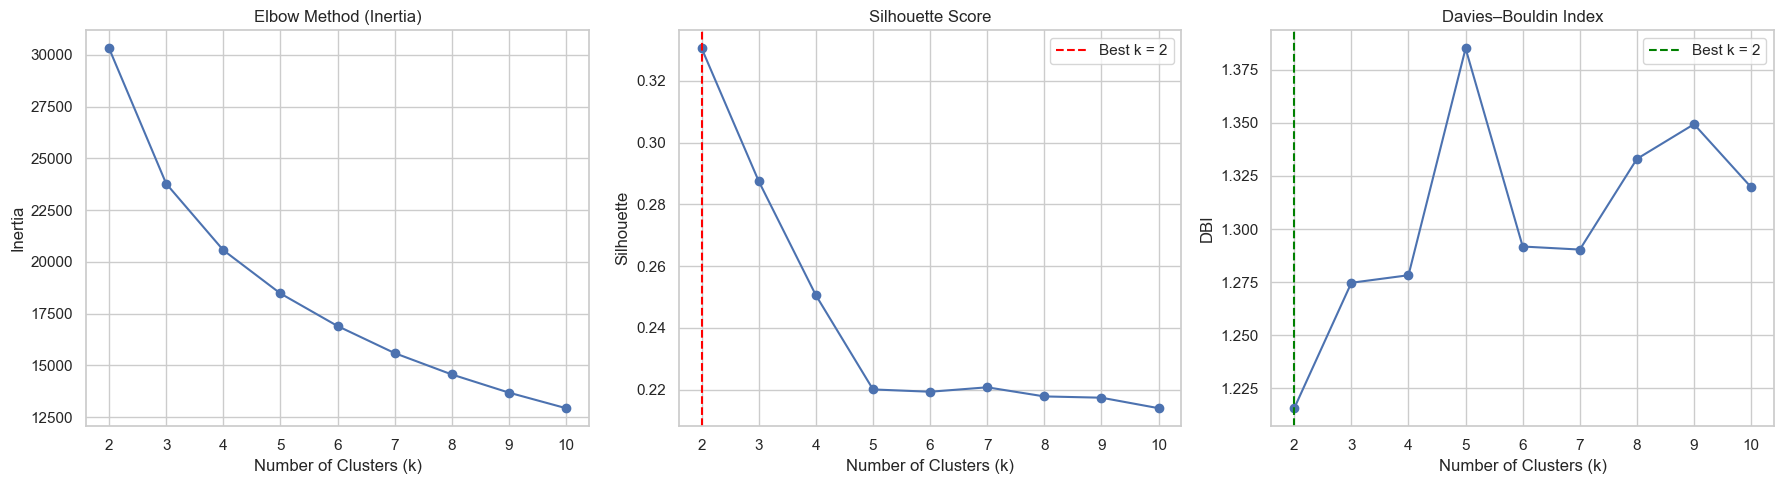

In [349]:
# Step 3: Plot evaluation metrics
plot_evaluation_metrics(outputs['evaluation_metrics'])

__Clustering Evaluation – Non-PCA Mode__

We evaluated cluster performance across different values of *k* (2–10) using three internal metrics: **Elbow (Inertia)**, **Silhouette Score**, and **Davies–Bouldin Index (DBI)**.

**Best k (Silhouette Score):** 2  
**Best k (Davies–Bouldin Index):** 2  

To better understand the results, here is a closer look at each metric:
> 1. **Elbow Method (Inertia)**  
The inertia steadily decreases as *k* increases, with a visible bend starting at **k = 3–4**, suggesting that further increase brings diminishing improvement in compactness.

> 2. **Silhouette Score**  
The highest Silhouette Score is achieved at **k = 2**, indicating well-separated clusters. However, **k = 3** still shows a relatively strong score (~0.29), which may offer **better segmentation granularity**.

> 3. **Davies–Bouldin Index (DBI)**  
The lowest DBI is also at **k = 2**, reflecting compact and distinct clusters. Yet again, **k = 3** maintains an acceptable DBI (~1.27), avoiding **over-segmentation**.


Although k = 2 gives the best internal metrics, it may oversimplify customer groups. **k = 3** strikes a better balance between **evaluation quality and actionable business segmentation**.

In [353]:
# Step 4–6: Apply final clustering with manual k
outputs = fit_final_kmeans(outputs, selected_k=3)

✅ Final evaluation with k = 3:
   • Silhouette Score = 0.2875
   • Davies–Bouldin Index = 1.2747


### Scenario 2: PCA Mode

In [356]:
# Step 1–3: Evaluate different k values
outputs = evaluate_clustering_k(df, use_pca=True)

✅ Best k (Silhouette Score): 2
✅ Best k (Davies–Bouldin Index): 10


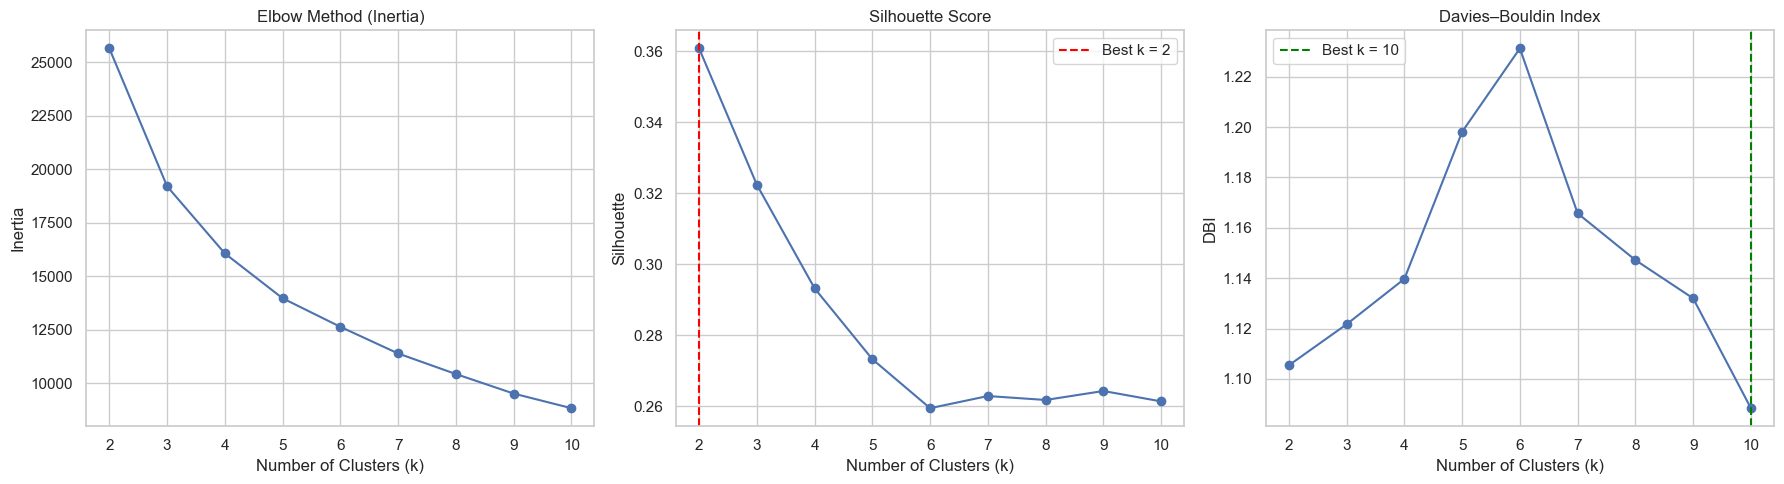

In [357]:
# Step 3: Plot evaluation metrics
plot_evaluation_metrics(outputs['evaluation_metrics'])

__Clustering Evaluation – PCA Mode__

We evaluated cluster performance across different values of *k* (2–10) using three internal metrics: **Elbow (Inertia)**, **Silhouette Score**, and **Davies–Bouldin Index (DBI)**.

**Best k (Silhouette Score):** 2  
**Best k (Davies–Bouldin Index):** 10

To better understand the results, here is a closer look at each metric:
> 1. **Elbow Method (Inertia)**  
The inertia decreases consistently as *k* increases, with a clear bend starting at **k = 3–4**, indicating that gains beyond this point are marginal.
> 2. **Silhouette Score**  
The highest score is achieved at **k = 2**, showing well-separated clusters. However, **k = 3** still maintains a solid score (~0.29), enabling more detailed customer segmentation.
> 3. **Davies–Bouldin Index (DBI)**  
The lowest DBI occurs at **k = 10**, but such high granularity can lead to oversegmentation. **k = 3** offers a balanced DBI (~1.27), retaining compact and distinct clusters.


Conclusion:
Although k = 2 and k = 10 are optimal from a metric perspective, they may **not serve practical business needs**:
> - k = 2 may oversimplify segmentation.
> - k = 10 may split customers into too many small, less actionable groups.
> - **k = 3 is selected as the final number of clusters**, balancing metric quality with business interpretability and segmentation depth.

In [362]:
# Step 4–6: Apply final clustering with manual k
outputs = fit_final_kmeans(outputs, selected_k=3)

✅ Final evaluation with k = 3:
   • Silhouette Score = 0.3224
   • Davies–Bouldin Index = 1.1217


## 2.3. Evaluating Clustering Approaches for Optimal Segmentation

After completing model fitting and validation in Step 5–6, we compare the clustering results from PCA and Non-PCA modes using internal evaluation metrics: Silhouette Score and Davies–Bouldin Index. **The mode with better performance is then selected for final visualization and interpretation** in Step 7–9

| **Scenario** | **Silhouette Score** | **Davies–Bouldin Index** | **Chosen k** |
| ------------ | -------------------- | ------------------------ | ------------ |
| **Non-PCA**  | 0.2875               | 1.2747                   | 3            |
| **PCA**      | **0.3224**           | **1.1217**               | **3**        |


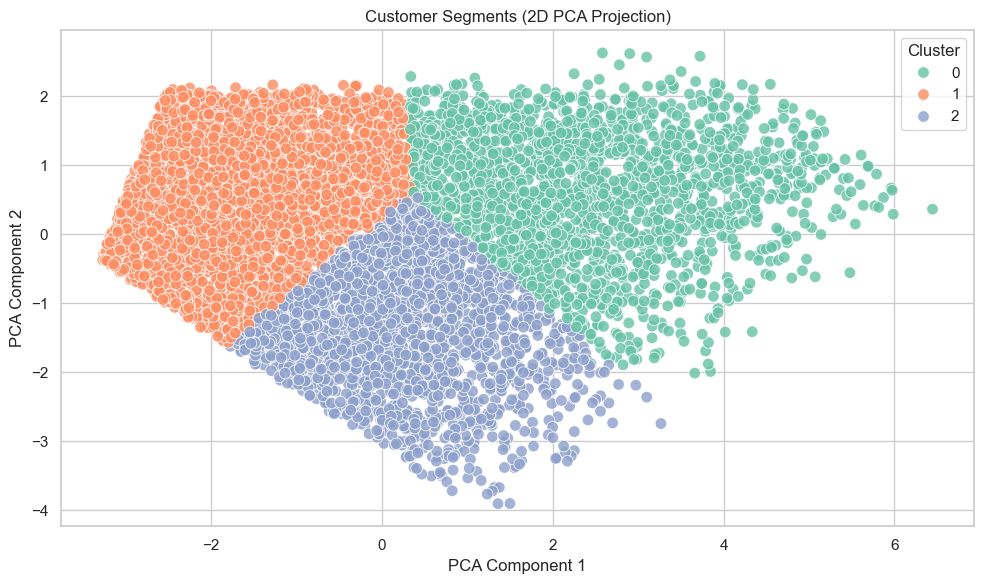

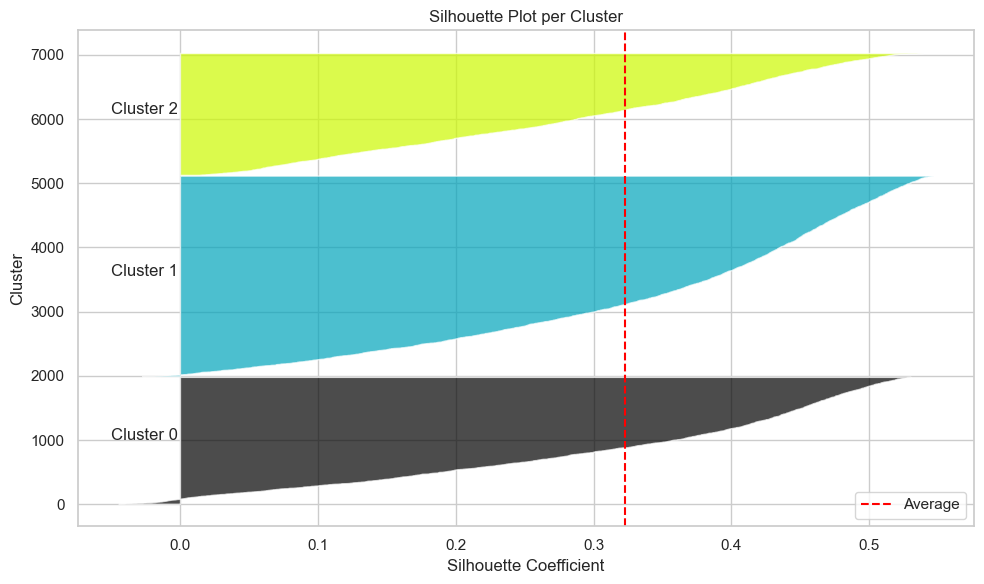

🔍 Cluster Profile Summary:


Total_Transactions  Avg_Transaction_Value   Total_Spent  \
Cluster                                                            
0                    750.43              14,765.76 10,910,630.28   
1                    490.76               4,496.91  2,178,793.77   
2                    259.24              13,895.97  3,499,050.54   

         Max_Transaction_Value  Min_Transaction_Value  Loyalty_Points_Earned  \
Cluster                                                                        
0                    45,704.62               4,494.94               2,503.12   
1                    12,630.10               1,245.41               2,524.46   
2                    42,814.95               4,262.20               2,462.23   

                 LTV  Customer Count  
Cluster                               
0       1,102,828.22            1976  
1         229,625.07            3124  
2         361,526.69            1900

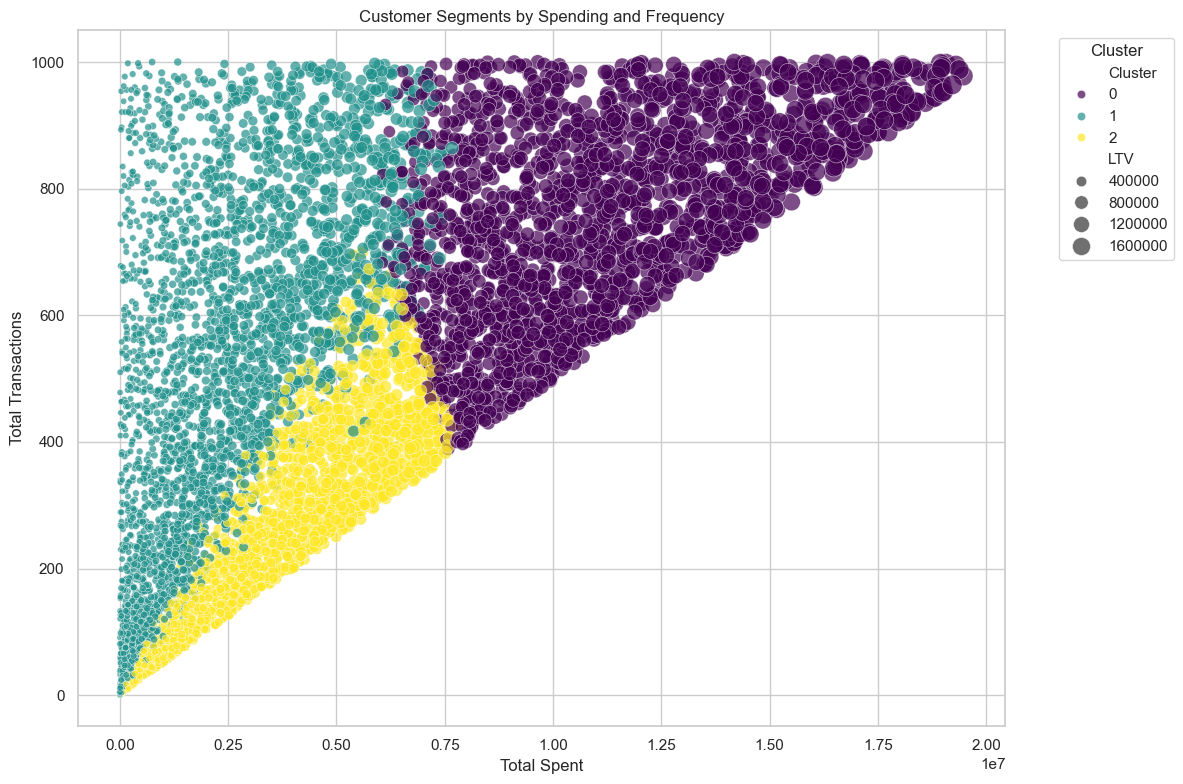

In [367]:
# Step 7–9: Plot and analyze the results
plot_cluster_results(outputs, outputs['clustered_df'], use_pca=True)

## 2.4. Cluster Interpretation

**1. PCA 2D Projection: Cluster Separation**

**Purpose**:  
This plot visualizes the three clusters in a reduced 2D space using PCA.

**Interpretation**:
- The clusters (0, 1, 2) are **well-separated**, indicating the clustering algorithm has identified **distinct groupings** in the data.
- This strong separation confirms that **PCA has improved cluster visibility** without major overlap.
- **Cluster 1 (orange)** and **Cluster 2 (blue)** are quite **compact**, while **Cluster 0 (green)** is slightly more **spread**.

**2. Silhouette Plot**
**Purpose**: 
Evaluates how well each data point fits its assigned cluster.

**Interpretation**:
- The average silhouette score is slightly above 0.3, indicating moderate cluster quality.
- All clusters have positive silhouette widths, suggesting no severe overlap or misclassification.
- Cluster 2 shows the highest cohesion, followed by Cluster 1, while Cluster 0 has slightly more variability in fit.

**3. Cluster Profile Table**
**Purpose**: 
Shows average metrics for each cluster across important business features.

**Interpretation**:
- Cluster 0: High spender, frequent buyer → Most valuable (highest Total Spent, LTV, and transactions).
- Cluster 1: Low average transaction, moderate activity → Budget-conscious or cautious customers.
- Cluster 2: Fewer transactions but high average value → Premium buyers who purchase less frequently but with higher ticket size.

**4. Business Insight Plot (Spending vs Frequency, Bubble = LTV)**

**Purpose**:
Maps customer segments based on transaction volume and spend, with LTV as bubble size.


| **Cluster** | **Key Behavior**                             | **Spending Pattern**             | **LTV Level**  | **Suggested Strategy**                                                                                             |
| ----------- | -------------------------------------------- | -------------------------------- | -------------- | ------------------------------------------------------------------------------------------------------------------ |
| **0**       | High frequency & high total spend            | High volume, consistent buyers   | Very High   | Retain with loyalty programs, personalized rewards, and exclusive perks to reinforce engagement and prevent churn. |
| **1**       | Low frequency & low transaction value        | Low engagement, budget-conscious | Low         | Reactivate via discounts, educational campaigns, or product trials to increase familiarity and drive usage.        |
| **2**       | Low frequency but high-value per transaction | Infrequent yet premium buyers    | Medium–High | Engage through VIP tiering, concierge-level service, or limited-time premium offers to increase retention.         |


## 2.5. Conclusion: Actionable Segmentation for Business Strategy
The resulting 3-cluster segmentation reveals clear differences in customer behavior, spending patterns, and value contribution. These distinctions provide a solid foundation to:
##### - **Deliver Personalized Financial Services**
By understanding each segment’s unique needs—from high-value power users to low-frequency, budget-conscious customers financial products and communication can be tailored to match user preferences, risk profiles, and transaction habits.
##### - **Optimize Marketing Strategies for Better ROI**
Targeted campaigns can be deployed with higher precision: reward loyal high spenders (Cluster 0), reactivate low-engagement users (Cluster 1), and upsell premium offerings to occasional high-value buyers (Cluster 2). This strategic targeting helps **maximize marketing** returns while **minimizing churn across segments**.

__Plot scatter plot + regression line for Total_Spent vs LTV__

In [373]:
# Select the features (independent variables) and the target (dependent variable)
selected_features = ['Total_Spent', 'Avg_Transaction_Value', 'Max_Transaction_Value', 'Min_Transaction_Value', 'Total_Transactions']

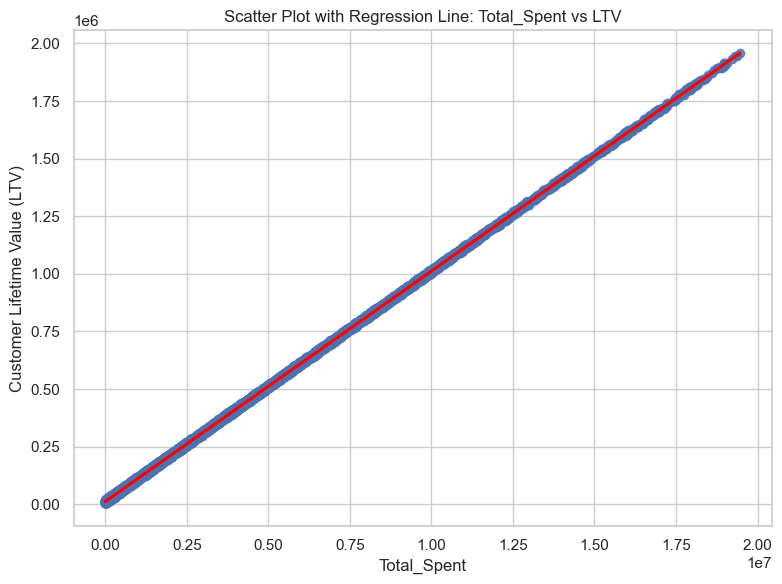

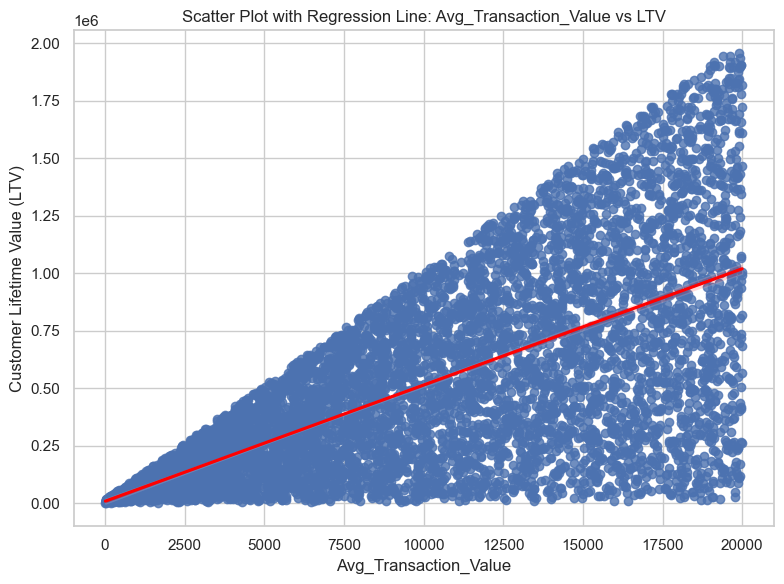

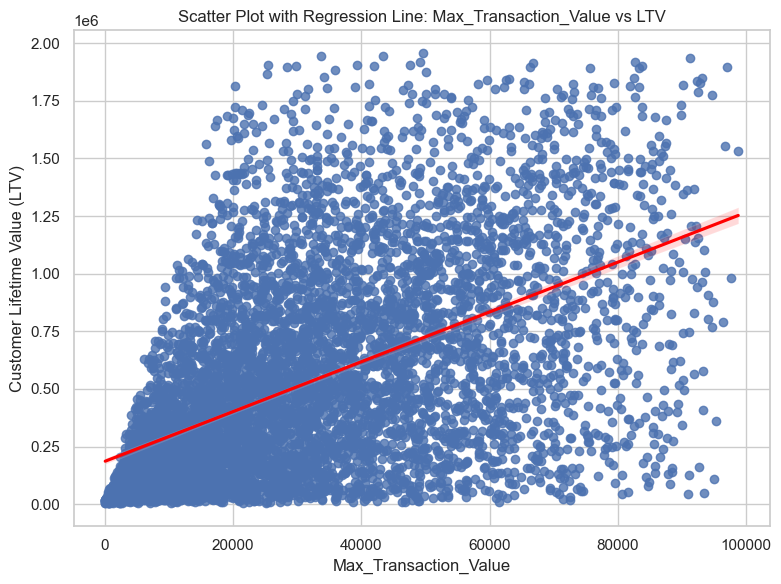

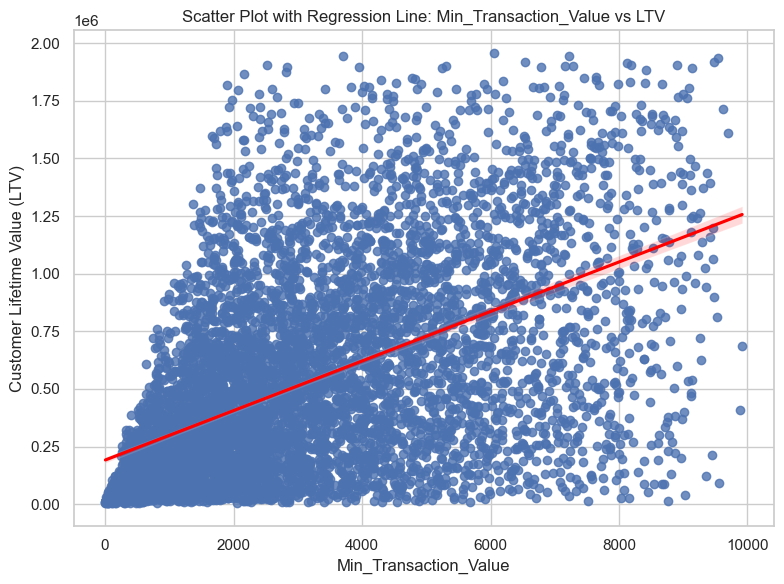

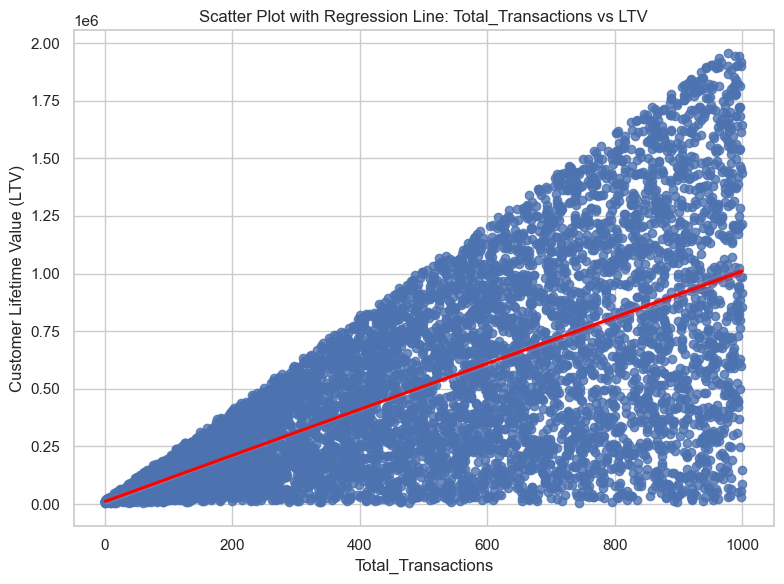

In [375]:
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[feature], y=df['LTV'], line_kws={"color": "red"})
    plt.title(f'Scatter Plot with Regression Line: {feature} vs LTV')
    plt.xlabel(feature)
    plt.ylabel('Customer Lifetime Value (LTV)')
    plt.tight_layout()
    plt.show()

__We excluded Total_Spent from the final model because its perfect linear relationship with LTV (as shown in the plot) caused the model to overfit—learning a fixed multiplier rather than uncovering the true behavioral or business drivers of value.__

__By removing Total_Spent, the model was forced to learn from underlying patterns (like retention, usage, customer type), making the predictions more generalizable, interpretable, and actionable, especially for new or low-spend customers where Total_Spent isn’t yet meaningful.__

# 3. Feature Engineering (RFM & Clustering)

__We created new, more insightful features like Recency, Frequency, RF_Score, and customer clusters. These features capture essential customer behavior patterns that are predictive of LTV without directly using LTV-derived information, which is crucial for preventing data leakage.__

In [379]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

print("All necessary libraries imported successfully!")

All necessary libraries imported successfully!


In [382]:
print(" Feature Engineering (RFM & Clustering) ---")

# ---Create RFM Metrics (Focus on Recency and Frequency for prediction) ---
# Recency: Days since last transaction (already available as 'Last_Transaction_Days_Ago')
df['Recency'] = df['Last_Transaction_Days_Ago']

# Frequency: Total number of transactions (already available as 'Total_Transactions')
df['Frequency'] = df['Total_Transactions']

# Create Quartiles for Recency and Frequency
# We invert Recency quartile so that a higher value means more recent (lower 'Last_Transaction_Days_Ago')
df['R_Quartile'] = pd.qcut(df['Recency'], 4, labels=[3, 2, 1, 0], duplicates='drop')
df['F_Quartile'] = pd.qcut(df['Frequency'], 4, labels=False, duplicates='drop')

# Convert quartiles to integer type
df['R_Quartile'] = df['R_Quartile'].astype(int)
df['F_Quartile'] = df['F_Quartile'].astype(int)

# Calculate RF Score (sum of Recency and Frequency Quartiles)
# We are NOT including a 'Monetary' component in RFM_Score calculation here,
# as the 'LTV' target variable represents total historical spending. Including 'Monetary'
# based on total spending would be a direct form of data leakage.
df['RF_Score'] = df['R_Quartile'] + df['F_Quartile']

# ---Customer Clustering (K-Means) ---
# Select a robust set of numerical features for clustering that are NOT direct proxies of LTV.
# These features should describe general customer behavior and demographics.
clustering_features = [
    'Age', 'Active_Days', 'Loyalty_Points_Earned', 'Referral_Count',
    'Cashback_Received', 'Support_Tickets_Raised', 'Issue_Resolution_Time',
    'Customer_Satisfaction_Score', 'RF_Score' # Use the engineered RF_Score
]

# Ensure all clustering features are numerical
for col in clustering_features:
    if df[col].dtype == 'object':
        print(f"Warning: Clustering feature '{col}' is object type. Consider encoding or removing before clustering.")
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median()) # Simple imputation for clustering, adjust as needed

X_clustering = df[clustering_features]

# Scale the features before applying KMeans (KMeans is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply KMeans clustering (using a pre-determined number of clusters, e.g., 4, for brevity)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nFirst 5 rows of DataFrame with new RFM and Cluster features:")
print(df.head())
print("\nFeature Engineering Complete.")

 Feature Engineering (RFM & Clustering) ---

First 5 rows of DataFrame with new RFM and Cluster features:
  Customer_ID  Age  Location Income_Level  Total_Transactions  \
0   cust_0000   54     Urban          Low                 192   
1   cust_0001   67  Suburban         High                 979   
2   cust_0002   44     Urban         High                 329   
3   cust_0003   30     Rural         High                  71   
4   cust_0004   58     Urban       Middle                 878   

   Avg_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value  \
0              16,736.38              60,216.83               6,525.81   
1              14,536.73              48,350.10               2,186.74   
2               7,061.37              32,521.16               2,743.41   
3              16,426.88              17,827.90               4,360.78   
4              10,800.09              17,497.63               4,532.87   

    Total_Spent  Active_Days  Last_Transaction_Days_Ago  \

 # 4. Exploratory Data Analysis Dashboard

__We generated interactive visualizations to gain a deeper understanding of the dataset's distributions, relationships between variables, and the characteristics of our newly created customer segments. This step provides valuable business insights from the data itself.__

 Exploratory Data Analysis Dashboard ---


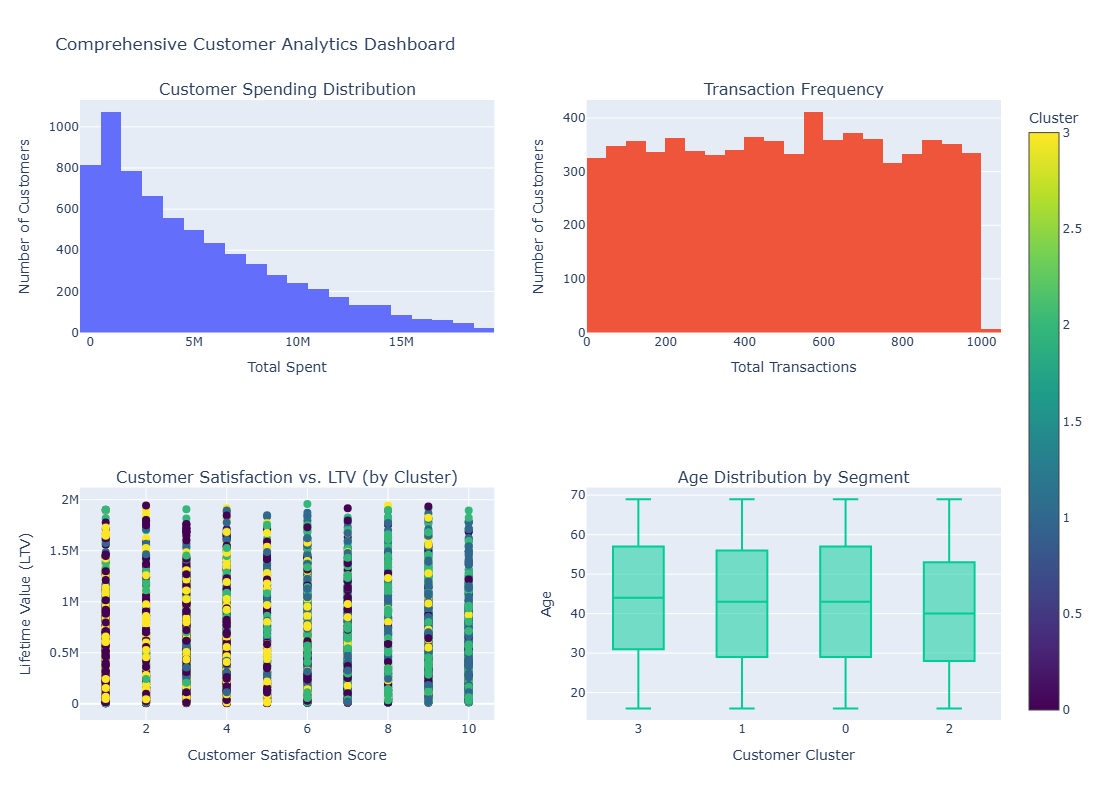


Exploratory Data Analysis Dashboard Generated.


In [386]:
print(" Exploratory Data Analysis Dashboard ---")

# Create a dashboard with multiple visualizations
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Customer Spending Distribution', 'Transaction Frequency',
                    'Customer Satisfaction vs. LTV (by Cluster)', 'Age Distribution by Segment')
)

# Add customer spending distribution
fig.add_trace(
    go.Histogram(x=df['Total_Spent'], nbinsx=30, name='Total Spending', marker_color='#636EFA'),
    row=1, col=1
)
fig.update_xaxes(title_text="Total Spent", row=1, col=1)
fig.update_yaxes(title_text="Number of Customers", row=1, col=1)


# Add transaction frequency distribution
fig.add_trace(
    go.Histogram(x=df['Total_Transactions'], nbinsx=20, name='Transaction Frequency', marker_color='#EF553B'),
    row=1, col=2
)
fig.update_xaxes(title_text="Total Transactions", row=1, col=2)
fig.update_yaxes(title_text="Number of Customers", row=1, col=2)

# Add customer satisfaction vs LTV, colored by customer Cluster
fig.add_trace(
    go.Scatter(x=df['Customer_Satisfaction_Score'], y=df['LTV'], mode='markers',
               marker=dict(size=8, color=df['Cluster'], colorscale='Viridis', showscale=True,
                           colorbar=dict(title='Cluster')),
               name='Satisfaction vs LTV'),
    row=2, col=1
)
fig.update_xaxes(title_text="Customer Satisfaction Score", row=2, col=1)
fig.update_yaxes(title_text="Lifetime Value (LTV)", row=2, col=1)


# Add age distribution by customer segment (Cluster)
fig.add_trace(
    go.Box(x=df['Cluster'].astype(str), y=df['Age'], name='Age by Segment', boxpoints='outliers',
           marker_color='#00CC96'), # Example color, adjust as desired
    row=2, col=2
)
fig.update_xaxes(title_text="Customer Cluster", row=2, col=2)
fig.update_yaxes(title_text="Age", row=2, col=2)


fig.update_layout(height=800, width=1200, title_text="Comprehensive Customer Analytics Dashboard", showlegend=False)
fig.show()

print("\nExploratory Data Analysis Dashboard Generated.")

# 5. Define Features (X) and Target (y) - CRITICAL DATA LEAKAGE HANDLING

__This was the most crucial step to ensure model validity. We explicitly separated the LTV target variable (y) from the features (X), and meticulously dropped all columns (e.g., Total_Spent, Monetary, Total_Transactions) that directly or indirectly revealed LTV, preventing the model from "cheating" and ensuring it learned genuine patterns.__

In [390]:
print(" Define Features (X) and Target (y) - CRITICAL LEAKAGE HANDLING ---")

# Define y (your target variable)
y = df['LTV']

# Define X (your features) by explicitly dropping leaky and irrelevant columns.
# This list is designed to prevent data leakage and keep only genuinely predictive features.
columns_to_drop_from_X = [
    'LTV',                   # Target variable itself must be excluded from features
    'Total_Spent',           # This is effectively the same as LTV in this dataset; a primary leakage source.
    'Customer_ID',           # Unique identifier, not a predictive feature.
    'Recency',               # Dropped in favor of its categorized 'R_Quartile' and combined 'RF_Score'.
    'Frequency',             # Dropped in favor of its categorized 'F_Quartile' and combined 'RF_Score'.
    'Total_Transactions',    # Directly contributes to 'Total_Spent' (and thus LTV); a leakage source.
    'Avg_Transaction_Value', # Directly contributes to 'Total_Spent' (and thus LTV); a leakage source.
    'RFM_Score',             # If present and derived with a 'Monetary' component based on LTV/Total_Spent, it's leaky.
    'R_Quartile',            # Keeping RF_Score, so individual quartiles are not strictly necessary as separate features for model.
    'F_Quartile'             # Keeping RF_Score, so individual quartiles are not strictly necessary as separate features for model.
]

# Ensure we only try to drop columns that actually exist in the DataFrame to prevent errors
actual_columns_to_drop = [col for col in columns_to_drop_from_X if col in df.columns]

X = df.drop(columns=actual_columns_to_drop, axis=1)

print(f"Shape of X (features after dropping problematic columns): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print("\nFirst 5 rows of X (features after dropping problematic columns):")
print(X.head())

# Check for any remaining object columns before encoding
print(f"\nObject columns in X before one-hot encoding: {X.select_dtypes(include='object').columns.tolist()}")
print("\nFeature and Target Definition Complete with Leakage Handling.")

 Define Features (X) and Target (y) - CRITICAL LEAKAGE HANDLING ---
Shape of X (features after dropping problematic columns): (7000, 17)
Shape of y (target): (7000,)

First 5 rows of X (features after dropping problematic columns):
   Age  Location Income_Level  Max_Transaction_Value  Min_Transaction_Value  \
0   54     Urban          Low              60,216.83               6,525.81   
1   67  Suburban         High              48,350.10               2,186.74   
2   44     Urban         High              32,521.16               2,743.41   
3   30     Rural         High              17,827.90               4,360.78   
4   58     Urban       Middle              17,497.63               4,532.87   

   Active_Days  Last_Transaction_Days_Ago  Loyalty_Points_Earned  \
0          140                        209                   2114   
1          229                        240                   2960   
2           73                         21                   3170   
3          299       

# 6. One-Hot Encode Categorical Features

__We converted non-numerical (categorical) features into a numerical format using one-hot encoding. This transformation is necessary as machine learning models primarily work with numerical data.__

In [394]:
print("One-Hot Encoding Categorical Columns in X ---")

# Identify categorical columns that are still in X (should be Location, Income_Level, App_Usage_Frequency, Preferred_Payment_Method)
categorical_cols_for_encoding = X.select_dtypes(include='object').columns.tolist()

if categorical_cols_for_encoding:
    X_encoded = pd.get_dummies(X, columns=categorical_cols_for_encoding, drop_first=True)
    print(f"One-hot encoded columns: {categorical_cols_for_encoding}")
else:
    X_encoded = X.copy()
    print("No object columns found in X to one-hot encode.")


print("\nFirst 5 rows of X_encoded (features after one-hot encoding):")
print(X_encoded.head())

print(f"Shape of X_encoded after encoding: {X_encoded.shape}")
print(f"Number of object columns remaining in X_encoded: {X_encoded.select_dtypes(include='object').shape[1]}")
print("\nOne-Hot Encoding Complete.")

One-Hot Encoding Categorical Columns in X ---
One-hot encoded columns: ['Location', 'Income_Level', 'App_Usage_Frequency', 'Preferred_Payment_Method']

First 5 rows of X_encoded (features after one-hot encoding):
   Age  Max_Transaction_Value  Min_Transaction_Value  Active_Days  \
0   54              60,216.83               6,525.81          140   
1   67              48,350.10               2,186.74          229   
2   44              32,521.16               2,743.41           73   
3   30              17,827.90               4,360.78          299   
4   58              17,497.63               4,532.87          236   

   Last_Transaction_Days_Ago  Loyalty_Points_Earned  Referral_Count  \
0                        209                   2114              25   
1                        240                   2960              20   
2                         21                   3170               0   
3                        285                   4756              35   
4                

# 7. Linear Regression Ridge: A Regularized Approach to Regression Modeling

## 7.1 Ridge Base Model

### 7.1.1 Train-Test Split

__We divided the prepared data into training and testing sets. This ensures that the model is trained on one part of the data and then evaluated on completely unseen data, providing an unbiased assessment of its ability to generalize.__

In [400]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Data Split into Training and Testing Sets ---")

# 7-1  Train / test split (75 % train, 25 % test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,                         # fitur lengkap (belum di-scale)
    y,                                 # target asli (LTV dalam rupiah, misalnya)
    test_size=0.25,
    random_state=42
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

# 7-2  Standardize fitur X (bukan y)
print("\nStandardizing X features with StandardScaler ...")
scaler = StandardScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),     # fit-transform hanya di train
    columns=X_encoded.columns,
    index=X_train.index
)
X_test = pd.DataFrame(
    scaler.transform(X_test),          # transform di test
    columns=X_encoded.columns,
    index=X_test.index
)
print("X standardised.  y is the same.\n")

Data Split into Training and Testing Sets ---
X_train shape: (5250, 22)
X_test  shape: (1750, 22)
y_train shape: (5250,)
y_test  shape: (1750,)

Standardizing X features with StandardScaler ...
X standardised.  y is the same.



__We initialized and trained a Ridge Regression model using its default parameters on our clean training data. This established a baseline performance to compare against future improvements__

### 7.1.2. Model Training

In [417]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# Step 1.1: Train Ridge Base Model
# ==========================================
ridge_base_model = Ridge(random_state=42)
ridge_base_model.fit(X_train, y_train)
print("\n--- Training Ridge Base Model ---")


--- Training Ridge Base Model ---


### 7.1.3. Model Evaluation

In [420]:
# ==========================================
# Step 1.2: Evaluate Ridge Base Model
# ==========================================

# Predict on both training and test sets
y_pred_train_base = ridge_base_model.predict(X_train)
y_pred_test_base = ridge_base_model.predict(X_test)

# Evaluation metrics - training
r2_train = r2_score(y_train, y_pred_train_base)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_base))
mae_train = mean_absolute_error(y_train, y_pred_train_base)

# Evaluation metrics - test
r2_test = r2_score(y_test, y_pred_test_base)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_base))
mae_test = mean_absolute_error(y_test, y_pred_test_base)

# Display as table
print("\nModel Evaluation (Training & Test) - Ridge Base Model ---")
print()
print(f"{'Metric':<15}{'Train':>15}{'Test':>15}")
print("-" * 45)
print(f"{'R-squared (R²)':<15}{r2_train:>15.4f}{r2_test:>15.4f}")
print(f"{'RMSE':<15}{rmse_train:>15.2f}{rmse_test:>15.2f}")
print(f"{'MAE':<15}{mae_train:>15.2f}{mae_test:>15.2f}")

# Model performance interpretation
r2_diff = abs(r2_train - r2_test)
print()
if r2_train < 0.5 and r2_test < 0.5:
    print("Model is underfitting (R² scores are low on both training and test sets).")
elif r2_diff > 0.05 and r2_train > r2_test:
    print("Model is overfitting (R² on training is significantly higher than on test set).")
else:
    print("Model has good generalization (no overfitting or underfitting).")



Model Evaluation (Training & Test) - Ridge Base Model ---

Metric                   Train           Test
---------------------------------------------
R-squared (R²)          0.7164         0.7141
RMSE                 232727.02      237939.49
MAE                  179409.22      183006.38

Model has good generalization (no overfitting or underfitting).


Based on **the evaluation results of the regression model on both the training and test datasets**, several key insights can be drawn regarding the model's performance and generalization capabilities. The following analysis aims to assess whether the model is experiencing overfitting or underfitting, as well as how well it explains the variance in the data.

__1. The Model Is Not Overfitting__
> - The R² values for the training and test sets are very close (0.7164 vs. 0.7141), with a very small difference (~0.0023).
> - This indicates that the model generalizes well to unseen data and is not overly dependent on the training set.

__2. The Model Is Not Underfitting__
> - An R² value of approximately 0.71 means the model is able to explain around 71% of the variance in the target variable (LTV).
> - This is considered quite good for many real-world regression problems, especially when the data is complex or contains noise.

### 7.1.4. Model Visualization

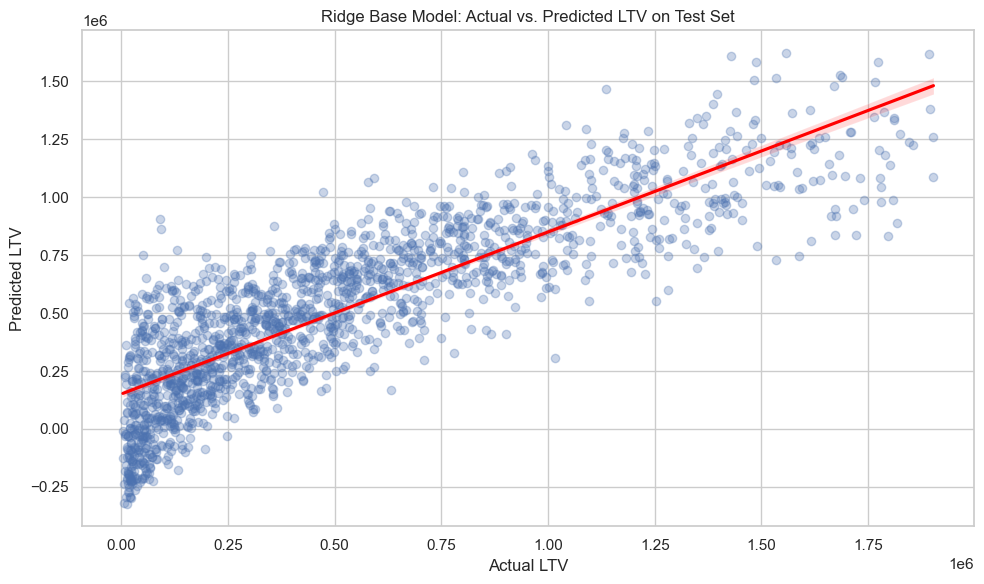

In [424]:
# ==========================================
# Step 1.3: Visualisation - Base Model
# ==========================================
plt.figure(figsize=(10, 6))
sns.regplot(
    x=y_test,
    y=y_pred_test_base,  # ✅ Ganti variabel ini
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Ridge Base Model: Actual vs. Predicted LTV on Test Set")
plt.grid(True)
plt.tight_layout()
plt.show()


The Ridge regression model demonstrates solid predictive performance, as shown by the close alignment of predicted and actual LTV values along the red trend line. However, **some dispersion remains, particularly at higher LTV values**, suggesting **that while the model captures the general trend well, it may struggle slightly with extreme cases**.

## 7.2. Hyperparameter Optimization for Ridge Regression

### 7.2.1. Model Selection via Cross-Validated Grid Search

__We systematically searched for the optimal combination of hyperparameters for the Ridge Regression model using GridSearchCV. This step aimed to fine-tune the model’s internal settings, such as the regularization strength and solver method, to potentially improve its predictive accuracy and generalization capability__

In [430]:
# ==========================================
# Step 2.1: Hyperparameter Tuning
# ==========================================
print("\n--- Starting Hyperparameter Tuning ---")
'''
param_grid = {
    'alpha': np.concatenate([
        np.linspace(0.001, 0.1, 5),
        np.linspace(0.2, 2, 5),
        np.linspace(5, 100, 5)
    ]),
    'fit_intercept': [True, False],
    'solver': ['auto', 'saga', 'sag']
}
'''
# 2. Define the hyperparameter search space
param_grid = {
    #'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'alpha': np.logspace(-3, 3, 20),
    'fit_intercept': [True, False],
    'solver': ['auto', 'saga', 'sag']            
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_model = Ridge(random_state=42, max_iter=10000)

grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning Complete ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV RMSE   : {-grid_search.best_score_:.2f}")


--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits

--- Hyperparameter Tuning Complete ---
Best parameters: {'alpha': 2.976351441631316, 'fit_intercept': True, 'solver': 'saga'}
Best CV RMSE   : 233678.09


### 7.2.2. Model Training & Evaluation (Tuned Model)

In [433]:
# ==========================================
# Step 2.2: Train & Evaluate Tuned Ridge Model
# ==========================================
print("\n--- Training Final Ridge Model with Best Parameters ---")
ridge_best_model = Ridge(random_state=42, max_iter=10000, **grid_search.best_params_)
ridge_best_model.fit(X_train, y_train)

# Predict & evaluate on test set
y_pred_tuned = ridge_best_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("\nTuned Ridge Model Evaluation:")
print(f"R²     : {r2_tuned:.4f}")
print(f"RMSE   : {rmse_tuned:.2f}")
print(f"MAE    : {mae_tuned:.2f}")


--- Training Final Ridge Model with Best Parameters ---

Tuned Ridge Model Evaluation:
R²     : 0.7141
RMSE   : 237942.37
MAE    : 182975.01


### 7.2.3. Model Visualisation (Tuned Model)

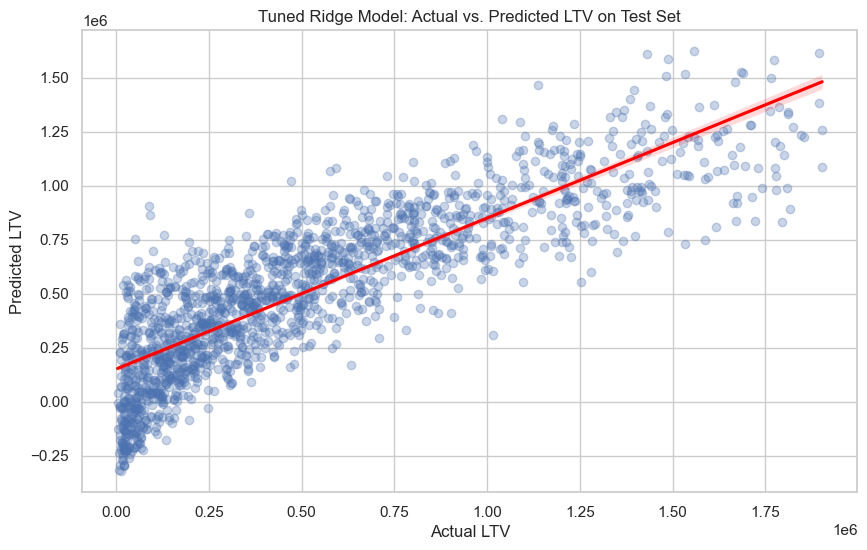

In [435]:
# ==========================================
# Step 2.3: Visualisation - Tuned Model
# ==========================================
plt.figure(figsize=(10, 6))
sns.regplot(
    x=y_test,
    y=y_pred_tuned,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Tuned Ridge Model: Actual vs. Predicted LTV on Test Set")
plt.grid(True)
plt.show()

### 7.2.4. Comparison - Base vs Tuned Model

In [437]:
# ==========================================
# Step 2.4: Comparison - Base vs Tuned Model
# ==========================================
print("\n--- Comparison: Ridge Base Model vs Tuned Ridge Model ---")
print(f"{'Metric':<30}{'Base Model':>15}{'Tuned Model':>15}")
print("-" * 60)
print(f"{'R-squared (R²)':<30}{r2_test:>15.4f}{r2_tuned:>15.4f}")
print(f"{'RMSE':<30}{rmse_test:>15.2f}{rmse_tuned:>15.2f}")
print(f"{'MAE':<30}{mae_test:>15.2f}{mae_tuned:>15.2f}")


--- Comparison: Ridge Base Model vs Tuned Ridge Model ---
Metric                             Base Model    Tuned Model
------------------------------------------------------------
R-squared (R²)                         0.7141         0.7141
RMSE                                237939.49      237942.37
MAE                                 183006.38      182975.01


__Interpretation__:

__1. R-squared (R²)__
- Both models have exactly the same R² (0.7141).
- This means hyperparameter tuning did not improve the proportion of variance explained by the model.
- The model explains ~71.4% of the variation in the target variable (LTV), which is still reasonable.
  
__2. RMSE (Root Mean Squared Error)__
- RMSE actually increased slightly from 237,939.49 (base) to 237,942.37 (tuned).
- This suggests that the tuned model may have slightly worse performance in terms of penalizing large errors, but the difference is negligible (<3).
  
__3. MAE (Mean Absolute Error)__
- The MAE decreased slightly from 183,006.38 to 182,975.01.
- This suggests the tuned model was very slightly better in terms of overall prediction error, but the improvement is tiny (only ~31).

__Insight Summary__:

- Tuning did not lead to meaningful improvement.
- The performance is essentially unchanged from the base model.
- This indicates that the default hyperparameters were already close to optimal, or that:
> - The model is reaching its limit under the current data and features.
> - Ridge Regression may not be flexible enough to capture more complexity in the data.

## 7.3. Feature Importance Analysis Based on Ridge Regression Coefficients

### 7.3.1. Feature Importance & Selection


=== All Feature Importances (sorted) ===
                                Feature  Importance
                               RF_Score  360,587.98
              Last_Transaction_Days_Ago  247,178.98
                  Min_Transaction_Value  141,622.59
                  Max_Transaction_Value  140,550.09
                      Location_Suburban    7,044.37
Preferred_Payment_Method_Wallet Balance    6,423.64
            Customer_Satisfaction_Score    5,863.71
                                Cluster    4,311.51
             App_Usage_Frequency_Weekly    4,098.67
                       Income_Level_Low    3,917.32
                         Referral_Count    3,829.83
    Preferred_Payment_Method_Debit Card    3,562.58
                  Loyalty_Points_Earned    3,037.61
                    Income_Level_Middle    2,831.77
           Preferred_Payment_Method_UPI    1,698.21
                         Location_Urban    1,675.60
                            Active_Days    1,662.47
                      

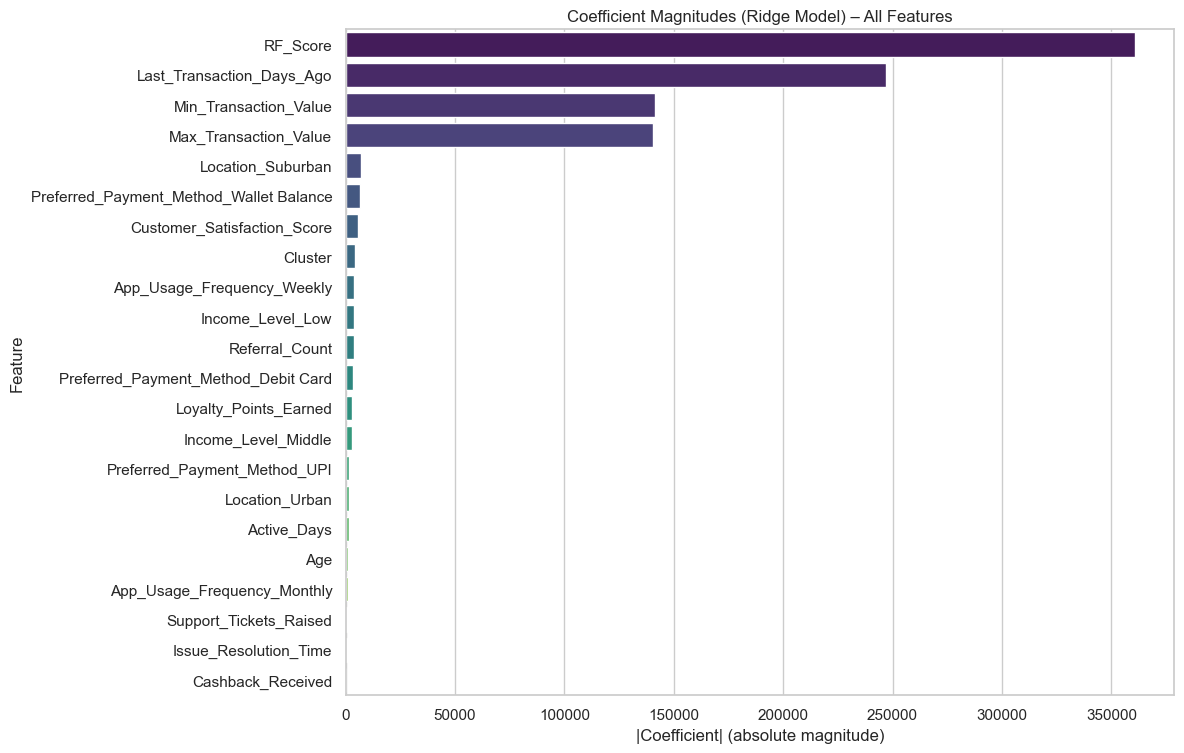


Feature Importance Analysis Complete.

Ridge Regression (Linear Model) Equation:
y = 512918.1277 + 1326.6395·Age + 140550.0949·Max_Transaction_Value + 141622.5853·Min_Transaction_Value + -1662.4652·Active_Days + 247178.9839·Last_Transaction_Days_Ago + -3037.6146·Loyalty_Points_Earned + -3829.8291·Referral_Count + 95.1865·Cashback_Received + 805.4282·Support_Tickets_Raised + -651.0627·Issue_Resolution_Time + 5863.7073·Customer_Satisfaction_Score + 360587.9796·RF_Score + 4311.5120·Cluster + 7044.3689·Location_Suburban + -1675.5999·Location_Urban + 3917.3159·Income_Level_Low + 2831.7653·Income_Level_Middle + -1230.1347·App_Usage_Frequency_Monthly + -4098.6674·App_Usage_Frequency_Weekly + 3562.5829·Preferred_Payment_Method_Debit Card + 1698.2092·Preferred_Payment_Method_UPI + 6423.6421·Preferred_Payment_Method_Wallet Balance


In [445]:
# ==========================================
# Step 3.1: Feature Importance & Selection
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Use the tuned Ridge model
model_for_importance = ridge_best_model

# 2. Coefficient magnitudes
abs_coef = np.abs(model_for_importance.coef_)
importance_df = (
    pd.DataFrame({'Feature': X_train.columns, 'Importance': abs_coef})
      .sort_values('Importance', ascending=False)
)

# 3. Display all feature importances
print("\n=== All Feature Importances (sorted) ===")
print(importance_df.to_string(index=False))

# 4. Visualise all features
plt.figure(figsize=(12, 0.35 * len(importance_df)))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Coefficient Magnitudes (Ridge Model) – All Features')
plt.xlabel('|Coefficient| (absolute magnitude)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance Analysis Complete.")

# 5. Show regression equation
coefficients = model_for_importance.coef_
intercept = model_for_importance.intercept_
features = X_train.columns
terms = [f"{coef:.4f}·{name}" for coef, name in zip(coefficients, features)]
equation = " + ".join(terms)
equation = f"y = {intercept:.4f} + " + equation
print("\nRidge Regression (Linear Model) Equation:")
print(equation)

__Feature Importance Summary (Ridge Model)__

The Ridge regression model reveals a clear distinction in feature importance, where a few variables show dominant predictive influence, while others contribute marginally:

- __Top 4 Most Influential Features__: __`RF_Score`__, `Last_Transaction_Days_Ago`, `Min_Transaction_Value`, `Min_Transaction_Value`
These features have exceptionally high absolute coefficients, indicating they are critical drivers of LTV prediction.

- __Moderately Important Features__ (Importance between ~1,000 to ~7,000):
Examples: `Customer_Satisfaction_Score`, `App_Usage_Frequency_Weekly`, `Preferred_Payment_Method_UPI`, `Age`  
These variables still provide valuable signals but with less intensity than the top-tier features.

- __Low-Impact Features (Below 1,000)__: `Support_Tickets_Raised`, `Issue_Resolution_Time`, `Cashback_Received`  
These features have relatively low influence on the model and were excluded during feature selection using the 1000 threshold.

To enhance model interpretability and reduce complexity without sacrificing predictive performance, feature selection was performed based on the absolute magnitude of the coefficients from the tuned Ridge regression model. A threshold of 1000 was applied, meaning **only features with |coefficient| > 1000 were retained** for the final model.

__This threshold was chosen because it balances two key objectives:__
- Retaining features with meaningful predictive impact – coefficients above 1000 demonstrated significant influence on the target variable (LTV), as observed in the importance ranking.
- Eliminating noise or low-impact variables – many features with coefficients below 1000 contributed minimally and may increase overfitting risk or computational overhead without offering substantial predictive value.

In [449]:
# 6. Select features based on threshold
threshold = 1000
selected_features_df = importance_df[importance_df['Importance'] > threshold]
selected_feature_names = selected_features_df['Feature'].tolist()
manual_keep = [
    "RF_Score", "Max_Transaction_Value",
    "Min_Transaction_Value", "Last_Transaction_Days_Ago"
]
for feature in manual_keep:
    if feature not in selected_feature_names:
        selected_feature_names.append(feature)

original_feature_names = X_encoded.columns.tolist()
removed_features = list(set(original_feature_names) - set(selected_feature_names))

X_reduced = X_encoded[selected_feature_names]
print(f"Original X_encoded shape: {X_encoded.shape}")
print(f"Selected {len(selected_feature_names)} features with |coef| > {threshold}:")
print(selected_feature_names)
print(f"Reduced X_reduced shape: {X_reduced.shape}")
print(f" Removed {len(removed_features)} features:")
print(removed_features)
print("\n✅ Feature reduction complete.")

Original X_encoded shape: (7000, 22)
Selected 19 features with |coef| > 1000:
['RF_Score', 'Last_Transaction_Days_Ago', 'Min_Transaction_Value', 'Max_Transaction_Value', 'Location_Suburban', 'Preferred_Payment_Method_Wallet Balance', 'Customer_Satisfaction_Score', 'Cluster', 'App_Usage_Frequency_Weekly', 'Income_Level_Low', 'Referral_Count', 'Preferred_Payment_Method_Debit Card', 'Loyalty_Points_Earned', 'Income_Level_Middle', 'Preferred_Payment_Method_UPI', 'Location_Urban', 'Active_Days', 'Age', 'App_Usage_Frequency_Monthly']
Reduced X_reduced shape: (7000, 19)
 Removed 3 features:
['Issue_Resolution_Time', 'Support_Tickets_Raised', 'Cashback_Received']

✅ Feature reduction complete.


### 7.3.2. Re-train on Reduced Features

In [452]:
# ==========================================
# Step 3.2: Re-train on Reduced Features
# ==========================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.25, random_state=42
)

scaler_reduced = StandardScaler()
X_train_selected = scaler_reduced.fit_transform(X_train_reduced)
X_test_selected = scaler_reduced.transform(X_test_reduced)

X_train_selected = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_feature_names)

print("\nTrain-Test split and standardization complete on reduced feature set.")


Train-Test split and standardization complete on reduced feature set.


### 7.3.3. Evaluate Model on Reduced Features


--- Evaluation of Ridge Model on Reduced Feature Set ---
Reduced Model RMSE: 237921.30
Reduced Model MAE: 182956.04
Reduced Model R2 Score: 0.7142


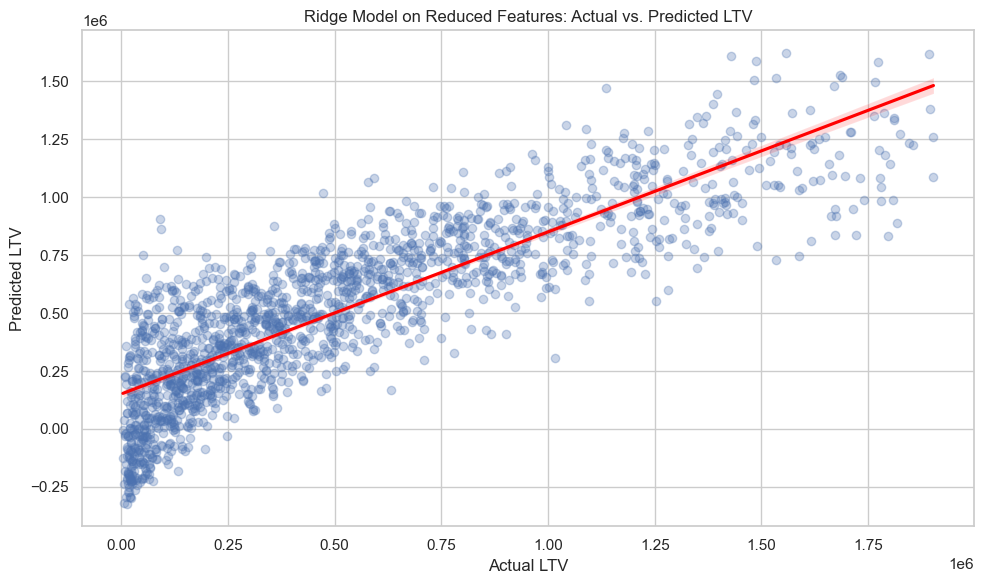

In [455]:
# ==========================================
# Step 3.3.: Evaluate Model on Reduced Features
# ==========================================
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_refit = Ridge(random_state=42, **grid_search.best_params_)
ridge_refit.fit(X_train_selected, y_train)

y_pred_refit = ridge_refit.predict(X_test_selected)
rmse_refit = np.sqrt(mean_squared_error(y_test, y_pred_refit))
mae_refit = mean_absolute_error(y_test, y_pred_refit)
r2_refit = r2_score(y_test, y_pred_refit)

print("\n--- Evaluation of Ridge Model on Reduced Feature Set ---")
print(f"Reduced Model RMSE: {rmse_refit:.2f}")
print(f"Reduced Model MAE: {mae_refit:.2f}")
print(f"Reduced Model R2 Score: {r2_refit:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_refit, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Ridge Model on Reduced Features: Actual vs. Predicted LTV")
plt.grid(True)
plt.tight_layout()
plt.show()

### 7.3.4. Final Comparison - All Models

In [458]:
# ==========================================
# Step 3.4: Final Comparison - All Models
# ==========================================
print("\n--- Final Model Comparison: Base vs Tuned vs Reduced ---")
print(f"{'Metric':<30}{'Base Model':>15}{'Tuned Model':>15}{'Reduced Model':>18}")
print("-" * 80)
print(f"{'R-squared (R²)':<30}{r2_test:>15.4f}{r2_tuned:>15.4f}{r2_refit:>18.4f}")
print(f"{'RMSE':<30}{rmse_test:>15.2f}{rmse_tuned:>15.2f}{rmse_refit:>18.2f}")
print(f"{'MAE':<30}{mae_test:>15.2f}{mae_tuned:>15.2f}{mae_refit:>18.2f}")

# Tampilkan jumlah fitur tiap model
print("\nNumber of Features in Each Model:")
print(f"{'Model':<30}{'Num Features'}")
print("-" * 45)
print(f"{'Base Model':<30}{X_train.shape[1]}")
print(f"{'Tuned Model (same features)':<30}{X_train.shape[1]}")
print(f"{'Reduced Feature Model':<30}{X_train_selected.shape[1]}")


--- Final Model Comparison: Base vs Tuned vs Reduced ---
Metric                             Base Model    Tuned Model     Reduced Model
--------------------------------------------------------------------------------
R-squared (R²)                         0.7141         0.7141            0.7142
RMSE                                237939.49      237942.37         237921.30
MAE                                 183006.38      182975.01         182956.04

Number of Features in Each Model:
Model                         Num Features
---------------------------------------------
Base Model                    22
Tuned Model (same features)   22
Reduced Feature Model         19


## 7.4. Model Performance ComparisonModel Evaluation on Test Set

| **Model Iteration**                          | **R-squared (R²)** | **Root Mean Squared Error (RMSE)** | **Mean Absolute Error (MAE)** | **Number of Features** |
|---------------------------------------------|--------------------|------------------------------------|-------------------------------|-------------------------|
| Base Model (default params, 22 features)     | 0.7141             | 237,939.49                         | 183,006.38                    | 22                      |
| Tuned Model (optimized params, 22 features)  | 0.7141             | 237,942.37                         | 182,975.01                    | 22                      |
| **Reduced Model (tuned, 19 features)**       | **0.7142**         | **237,921.30**                     | **182,956.04**                | **19**                  |


Base vs Tuned Model (same features):
The tuned Ridge model with optimized hyperparameters did not significantly improve performance compared to the base model. R² and RMSE are practically identical.
This suggests that default hyperparameters were already close to optimal for this feature set.

### Model Comparison Summary

#### Base vs Tuned Model (Same Features)
The tuned Ridge model with optimized hyperparameters did **not significantly improve performance** compared to the base model.

- R² and RMSE are practically identical.

**Insight**: The default hyperparameters were already close to optimal for this feature set.

---

#### Tuned vs Reduced Model
After removing 3 low-importance features, the reduced model achieved:

- A slightly **better R²** (0.7142 vs 0.7141)  
- A slightly **lower RMSE** and **lower MAE**  
- A **simpler model** with fewer input features (19 vs 22)

**Insight**: Removing weak or redundant features slightly improved generalization while simplifying the model.

---

#### Overall Insight
All three models perform similarly, indicating a **stable and well-regularized solution**.

However, the **Reduced Ridge Model** is preferred because it:

- Matches or slightly exceeds the predictive performance  
- Uses **fewer parameters**  
- Offers better **interpretability** and **computational efficiency**


We developed a machine learning model to predict Customer Lifetime Value (LTV) with an **R²** of **0.7142** and an MAE of approximately **$183,000. This means we can estimate customer value within **±26%** on average, which is a solid result considering the large variance in customer spending patterns.

### Key Business Insights & Suggestions

__Highly accurate LTV model reveals that customer engagement, particularly frequent and high-value transactions (`RF_Score`, `Last_transaction_Days_Ago`, `Max_Transaction_Value`, and `Min_Transaction_Value`), are the strongest drivers of Lifetime Value.__
>__Businesses should prioritize strategies to encourage more frequent and larger wallet usage__,
>__Alongside proactive re-engagement for inactive users.__
> Maintaining excellent customer support also contributes significantly to LTV.
> we can Utilize this model to identify high-potential customers for targeted marketing and optimize resource allocation.
>__By focusing on these data-driven insights, we can maximize customer profitability and refine growth strategy.__

# 8. XGBoost Regression

## 8.1. XGBoost Regressor

__We initialized and trained a powerful XGBoost Regressor model using its default parameters on our clean training data. This established a baseline performance to compare against future improvements.__

### 8.1.1. Train-Test Split (XGBoost)

In [469]:
print("Data Split into Training and Testing Sets ---")

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nColumns in X_train just before model training/tuning:")
print(X_train.columns.tolist())
print("\nData Split Complete. X_train is ready for modeling (verified for leakage).")

Data Split into Training and Testing Sets ---
X_train shape: (5250, 22)
X_test shape: (1750, 22)
y_train shape: (5250,)
y_test shape: (1750,)

Columns in X_train just before model training/tuning:
['Age', 'Max_Transaction_Value', 'Min_Transaction_Value', 'Active_Days', 'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned', 'Referral_Count', 'Cashback_Received', 'Support_Tickets_Raised', 'Issue_Resolution_Time', 'Customer_Satisfaction_Score', 'RF_Score', 'Cluster', 'Location_Suburban', 'Location_Urban', 'Income_Level_Low', 'Income_Level_Middle', 'App_Usage_Frequency_Monthly', 'App_Usage_Frequency_Weekly', 'Preferred_Payment_Method_Debit Card', 'Preferred_Payment_Method_UPI', 'Preferred_Payment_Method_Wallet Balance']

Data Split Complete. X_train is ready for modeling (verified for leakage).


### 8.1.2. Model Training

In [472]:
# Initialize the XGBRegressor model with default parameters
# 'objective': 'reg:squarederror' for regression problems
# 'eval_metric': 'rmse' for Root Mean Squared Error during training
# 'random_state': for reproducibility
# 'n_jobs': -1 uses all available CPU cores for faster training
xgb_base_model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42, n_jobs=-1)

# Train the model using your now clean X_train and y_train
xgb_base_model.fit(X_train, y_train)

print("XGBoost base model training complete.")

XGBoost base model training complete.


### 8.1.3. Model Evaluation (Base Model)

 Model Evaluation on Test Set (Base Model) ---
Base Model Root Mean Squared Error (RMSE): 177775.49
Base Model Mean Absolute Error (MAE): 127832.68
Base Model R-squared (R2 Score): 0.8404


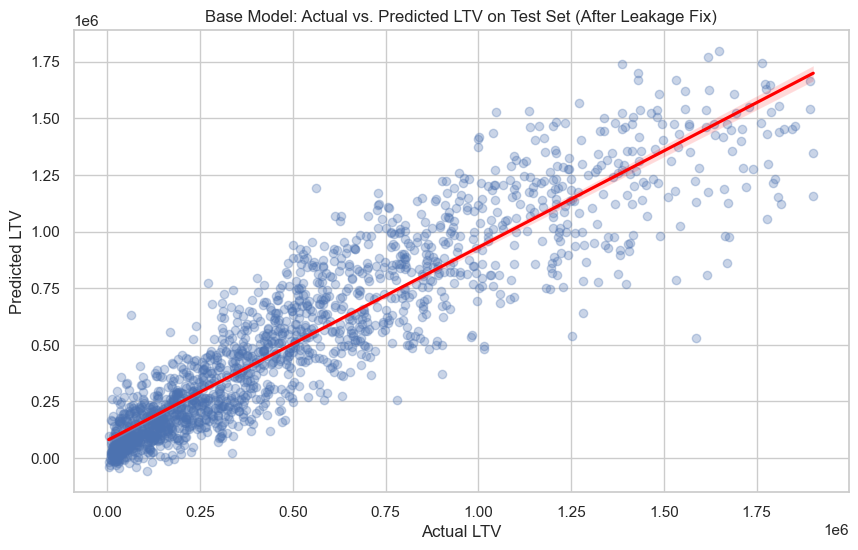


Base Model Evaluation Complete.


In [475]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print(" Model Evaluation on Test Set (Base Model) ---")

# Make predictions on the test set using the base model
y_pred_base = xgb_base_model.predict(X_test)

# Calculate evaluation metrics
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
mae_base = mean_absolute_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)

print(f"Base Model Root Mean Squared Error (RMSE): {rmse_base:.2f}")
print(f"Base Model Mean Absolute Error (MAE): {mae_base:.2f}")
print(f"Base Model R-squared (R2 Score): {r2_base:.4f}")

# Plotting Actual vs. Predicted LTV
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_base, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Base Model: Actual vs. Predicted LTV on Test Set (After Leakage Fix)")
plt.grid(True)
plt.show()

print("\nBase Model Evaluation Complete.")

__assessed the performance of our initial model on the unseen test set. The realistic R-squared score (around 0.84) at this stage confirmed that our data leakage prevention efforts were successful, unlike previous misleading results.__

## 8.2. Hyperparameter Tuning (XGBoost Regressor)

In [479]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds (trees)
    'learning_rate': [0.05, 0.1],          # Step size shrinkage
    'max_depth': [3, 5, 7],                # Maximum depth of a tree
    'subsample': [0.8, 1.0],               # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0]         # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBRegressor model for tuning
xgb_tune = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    cv=3, # Using 3-fold cross-validation
    scoring='neg_root_mean_squared_error', # We want to minimize RMSE, so we use its negative
    verbose=1, # Print progress messages
    n_jobs=-1 # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning Complete ---")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_cv_rmse = -grid_search.best_score_ # Convert back to positive RMSE

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation RMSE: {best_cv_rmse:.2f}")

# Train the final model with the best parameters
print("\n--- Training Final Model with Best Parameters ---")
final_tuned_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42,
    n_jobs=-1,
    **best_params # Unpack the best parameters here
)

final_tuned_model.fit(X_train, y_train)

print("Final model trained with best hyperparameters.")
print("\nHyperparameter Tuning Complete.")

Fitting 3 folds for each of 72 candidates, totalling 216 fits

--- Hyperparameter Tuning Complete ---
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation RMSE: 167871.25

--- Training Final Model with Best Parameters ---
Final model trained with best hyperparameters.

Hyperparameter Tuning Complete.


__We systematically searched for the optimal combination of hyperparameters for the XGBoost model using GridSearchCV. This step aimed to fine-tune the model's internal settings to potentially improve its predictive accuracy and generalization.__

#### 8.2.1 Model Evaluation (Tuned Model)

Tuned Model Root Mean Squared Error (RMSE): 165414.81
Tuned Model Mean Absolute Error (MAE): 116384.93
Tuned Model R-squared (R2 Score): 0.8618


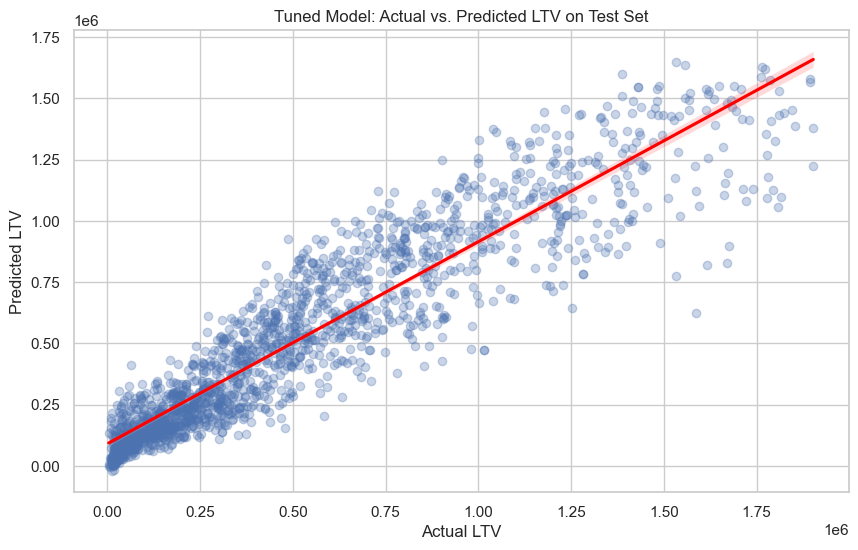


Tuned Model Evaluation Complete.


In [482]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported if not already globally available

# Make predictions on the test set using the tuned model
y_pred_tuned = final_tuned_model.predict(X_test)

# Calculate evaluation metrics
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"Tuned Model Mean Absolute Error (MAE): {mae_tuned:.2f}")
print(f"Tuned Model R-squared (R2 Score): {r2_tuned:.4f}")

# Plotting Tuned Model Actual vs. Predicted LTV
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_tuned, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Tuned Model: Actual vs. Predicted LTV on Test Set")
plt.grid(True)
plt.show()

print("\nTuned Model Evaluation Complete.")

__We evaluated the performance of the hyperparameter-tuned model on the test set. This allowed us to confirm that tuning successfully improved the model's metrics (higher R-squared, lower RMSE/MAE) over the base model.__

#### 8.2.2. Feature Importance Analysis

Top 15 Feature Importances:
                                Feature  Importance
11                             RF_Score        0.25
1                 Max_Transaction_Value        0.24
2                 Min_Transaction_Value        0.22
4             Last_Transaction_Days_Ago        0.11
19  Preferred_Payment_Method_Debit Card        0.01
17          App_Usage_Frequency_Monthly        0.01
20         Preferred_Payment_Method_UPI        0.01
9                 Issue_Resolution_Time        0.01
7                     Cashback_Received        0.01
15                     Income_Level_Low        0.01
18           App_Usage_Frequency_Weekly        0.01
6                        Referral_Count        0.01
5                 Loyalty_Points_Earned        0.01
3                           Active_Days        0.01
8                Support_Tickets_Raised        0.01


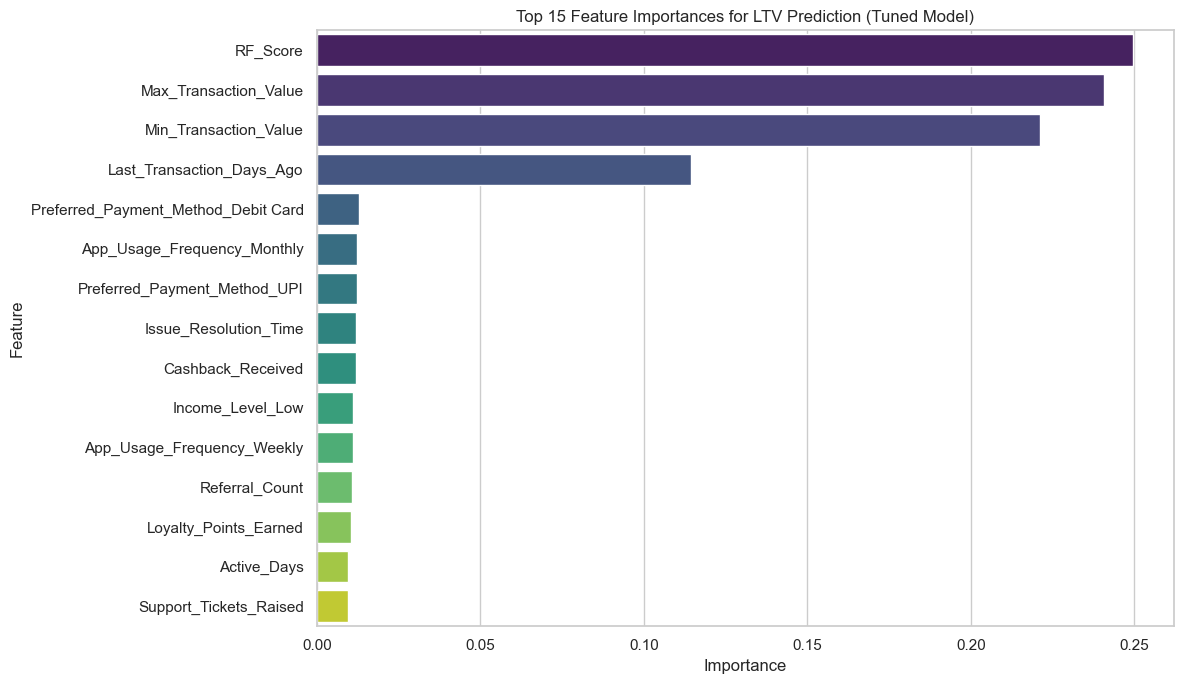


Feature Importance Analysis Complete.


In [487]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choosing the best-performing model for feature importance
model_for_importance = final_tuned_model

# Get feature importances from the trained model
feature_importances = model_for_importance.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns # Use columns from X_train as they are the features used in the model
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 15 Feature Importances:")
print(importance_df.head(15))

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances for LTV Prediction (Tuned Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance Analysis Complete.")

__We analyzed the trained model to understand which features contributed most to its predictions. This provides critical insights into the primary drivers of Customer LTV, guiding business strategies.__

### 8.3. Feature Selection based on Importance (Reduction)

In [491]:
import pandas as pd # Ensure pandas is imported if not already globally available

# Filter features with importance > 0.01 (adjust threshold if you want to keep more/fewer features)
selected_features_df = importance_df[importance_df['Importance'] > 0.01]
selected_feature_names = selected_features_df['Feature'].tolist()

if 'RF_Score' not in selected_feature_names:
    selected_feature_names.append('RF_Score')
# Ensuring Max_Transaction_Value, Min_Transaction_Value, Last_Transaction_Days_Ago are included as well,
# though they should be caught by the 0.01 threshold.
if 'Max_Transaction_Value' not in selected_feature_names:
    selected_feature_names.append('Max_Transaction_Value')
if 'Min_Transaction_Value' not in selected_feature_names:
    selected_feature_names.append('Min_Transaction_Value')
if 'Last_Transaction_Days_Ago' not in selected_feature_names:
    selected_feature_names.append('Last_Transaction_Days_Ago')


# Create a new DataFrame with only the selected features
X_reduced = X_encoded[selected_feature_names]

print(f"Original X_encoded shape: {X_encoded.shape}")
print(f"Selected {len(selected_feature_names)} features based on importance (>0.01):")
print(selected_feature_names)
print(f"New X_reduced shape: {X_reduced.shape}")

print("\nFirst 5 rows of X_reduced (features after reduction):")
print(X_reduced.head())

print("\nFeature Reduction Complete.")

Original X_encoded shape: (7000, 22)
Selected 13 features based on importance (>0.01):
['RF_Score', 'Max_Transaction_Value', 'Min_Transaction_Value', 'Last_Transaction_Days_Ago', 'Preferred_Payment_Method_Debit Card', 'App_Usage_Frequency_Monthly', 'Preferred_Payment_Method_UPI', 'Issue_Resolution_Time', 'Cashback_Received', 'Income_Level_Low', 'App_Usage_Frequency_Weekly', 'Referral_Count', 'Loyalty_Points_Earned']
New X_reduced shape: (7000, 13)

First 5 rows of X_reduced (features after reduction):
   RF_Score  Max_Transaction_Value  Min_Transaction_Value  \
0         1              60,216.83               6,525.81   
1         4              48,350.10               2,186.74   
2         4              32,521.16               2,743.41   
3         0              17,827.90               4,360.78   
4         3              17,497.63               4,532.87   

   Last_Transaction_Days_Ago  Preferred_Payment_Method_Debit Card  \
0                        209                             

__Based on feature importance, we reduced the number of features by keeping only the most impactful ones. This aimed to simplify the model, improve its interpretability, and potentially enhance its performance by reducing noise.__

In [494]:
import numpy as np # Ensure numpy is imported if not already globally available
from sklearn.model_selection import train_test_split # Ensure train_test_split is imported

print(" Re-run Data Split with Reduced Features ---")

# Split the data into training and testing sets using X_reduced
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42)

print(f"X_train_reduced shape: {X_train_reduced.shape}")
print(f"X_test_reduced shape: {X_test_reduced.shape}")
print(f"y_train shape (should be same as before): {y_train.shape}")
print(f"y_test shape (should be same as before): {y_test.shape}")

print("\nData Split with Reduced Features Complete.")

 Re-run Data Split with Reduced Features ---
X_train_reduced shape: (5250, 13)
X_test_reduced shape: (1750, 13)
y_train shape (should be same as before): (5250,)
y_test shape (should be same as before): (1750,)

Data Split with Reduced Features Complete.


In [496]:
from xgboost import XGBRegressor # Ensure XGBRegressor is imported

print(" Re-run Model Training with Reduced Features ---")

# Re-initialize the final_tuned_model using the best parameters found earlier.
# This ensures we use the best configuration on the reduced dataset.
if 'best_params' not in locals():
    print("Warning: 'best_params' not found. Using default parameters for retrained model.")
    # Fallback to default if best_params is somehow lost
    retrained_model_reduced = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42, n_jobs=-1)
else:
    retrained_model_reduced = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        random_state=42,
        n_jobs=-1,
        **best_params # Use the best parameters found during original tuning
    )

# Train the model on the reduced training data
retrained_model_reduced.fit(X_train_reduced, y_train)

print("XGBoost model retrained with reduced features complete.")

 Re-run Model Training with Reduced Features ---
XGBoost model retrained with reduced features complete.


### 8.3.1. Re-run Model Evaluation with Reduced Features

 Re-run Model Evaluation with Reduced Features ---
Reduced Feature Model Root Mean Squared Error (RMSE): 164200.25
Reduced Feature Model Mean Absolute Error (MAE): 115396.83
Reduced Feature Model R-squared (R2 Score): 0.8639


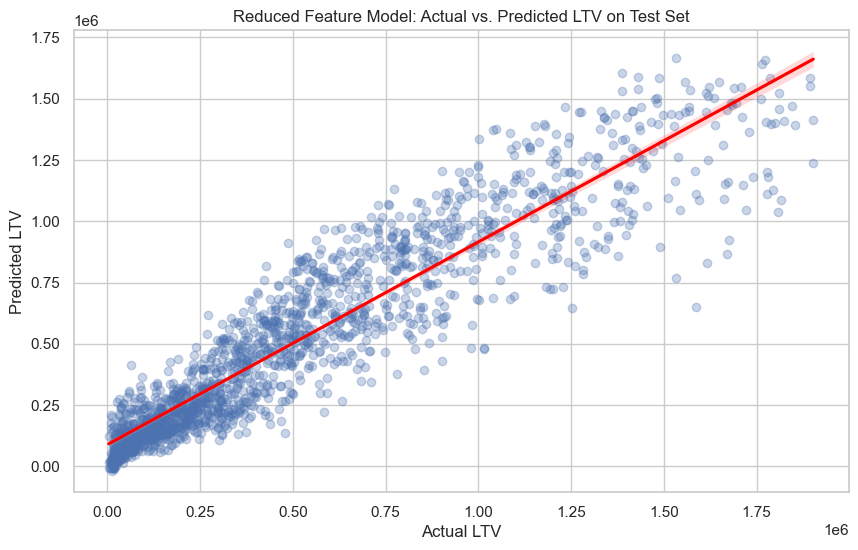


Reduced Feature Model Evaluation Complete.


In [499]:
import numpy as np # Ensure numpy is imported if not already globally available
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Ensure metrics are imported

print(" Re-run Model Evaluation with Reduced Features ---")

# Make predictions on the reduced test set
y_pred_reduced = retrained_model_reduced.predict(X_test_reduced)

# Calculate evaluation metrics
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Reduced Feature Model Root Mean Squared Error (RMSE): {rmse_reduced:.2f}")
print(f"Reduced Feature Model Mean Absolute Error (MAE): {mae_reduced:.2f}")
print(f"Reduced Feature Model R-squared (R2 Score): {r2_reduced:.4f}")

# Plotting Reduced Feature Model Actual vs. Predicted LTV
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_reduced, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Reduced Feature Model: Actual vs. Predicted LTV on Test Set")
plt.grid(True)
plt.show()

print("\nReduced Feature Model Evaluation Complete.")

Top 13 Feature Importances:
                                Feature  Importance
0                              RF_Score        0.29
1                 Max_Transaction_Value        0.26
2                 Min_Transaction_Value        0.23
3             Last_Transaction_Days_Ago        0.13
8                     Cashback_Received        0.01
11                       Referral_Count        0.01
7                 Issue_Resolution_Time        0.01
6          Preferred_Payment_Method_UPI        0.01
5           App_Usage_Frequency_Monthly        0.01
12                Loyalty_Points_Earned        0.01
10           App_Usage_Frequency_Weekly        0.01
4   Preferred_Payment_Method_Debit Card        0.01
9                      Income_Level_Low        0.01


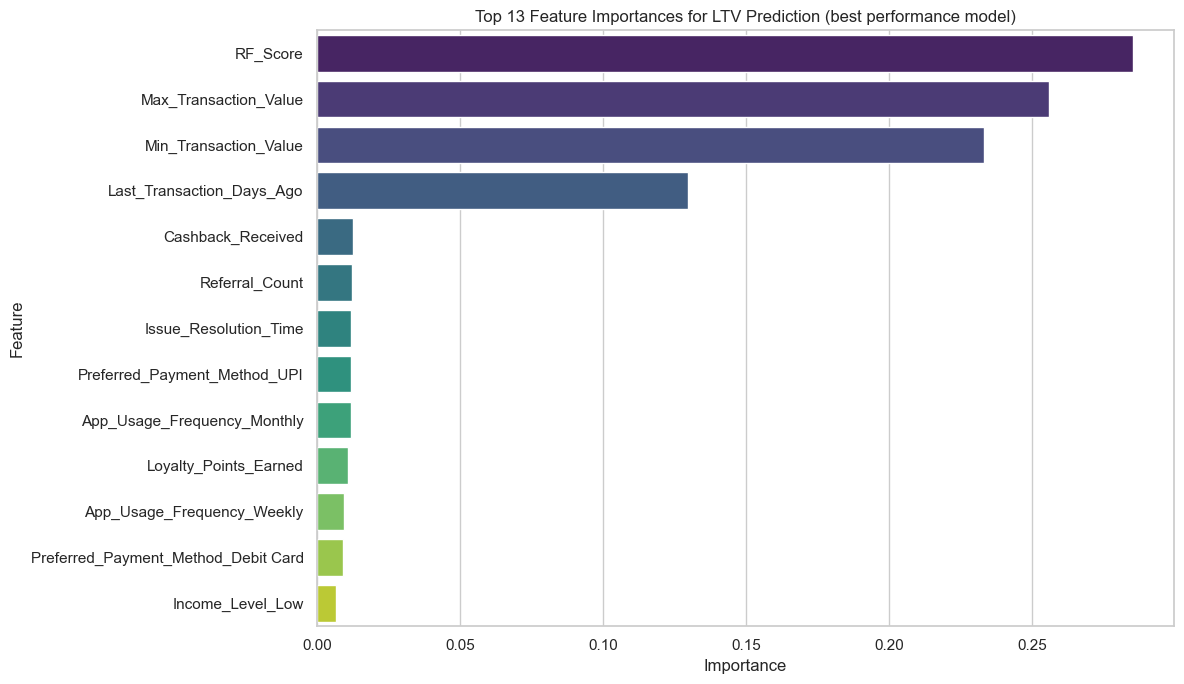


Feature Importance Analysis Complete.


In [501]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choosing the best-performing model for feature importance
model_for_importance = retrained_model_reduced

# Get feature importances from the trained model
feature_importances = model_for_importance.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train_reduced.columns # Use columns from X_train as they are the features used in the model
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 13 Feature Importances:")
print(importance_df.head(15))

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 13 Feature Importances for LTV Prediction (best performance model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance Analysis Complete.")

__We evaluated the performance of the model trained on reduced features. This final evaluation confirmed that simplifying the model not only maintained but slightly improved its predictive accuracy and efficiency, marking a successful optimization.__

### 8.4 Model Performance Comparison (XGBOOST)

Here's a comparison of the key evaluation metrics for each iteration of model:

| Model Iteration                   | R-squared (R²) | Root Mean Squared Error (RMSE) | Mean Absolute Error (MAE) | Number of Features |
| :-------------------------------- | :------------- | :----------------------------- | :------------------------ | :----------------- |
| **Base Model** (Default params, all features) | 0.8404         | 177775.49                      | 127832.68                 | 22                 |
| **Tuned Model** (Optimized params, all features) | 0.8618         | 165414.81                      | 116384.93                 | 22                 |
| **Reduced Feature Model** (Tuned params, 13 features) | **0.8639** | **164200.25** | **115396.83** | **13** |

**Key Takeaways from Comparison:**

* **Significant Improvement from Base:** Both the Tuned and Reduced Feature models show substantial improvements over the Base Model, particularly in reducing RMSE and MAE, and increasing R-squared. This highlights the value of hyperparameter tuning.
* **Success of Feature Reduction:** The model with a reduced set of 13 features not only maintained but **marginally improved** its performance (higher R² and lower RMSE/MAE) compared to the tuned model using all 22 features. This indicates that the low-importance features were either noise or redundant, and their removal led to a more parsimonious and equally (or slightly more) accurate model.
* **Final Model Excellence:** The **Reduced Feature Model (R²: 0.8639)** represents most robust, accurate, and efficient solution. It demonstrates strong predictive power with a focused set of features, providing reliable insights for business strategy.

__We developed a machine learning model to predict Customer Lifetime Value (LTV) with an R² of 0.864 and an MAE of ~$115,000. This means we can estimate customer value within ±23% on average, which is a strong result given the scale of spending across our customer base.__

Interestingly, __although Total_Spent and LTV are closely correlated (LTV ≈ 10% of Total_Spent in most cases), including Total_Spent in the model caused it to overfit__ and behave more like a hardcoded rule than a predictive model. It led to an artificially low RMSE (~1), suggesting the model simply learned a constant multiplier.

>To avoid this and better capture behavioral and strategic drivers of LTV, we excluded Total_Spent from training. This forced the model to learn from other variables that reflect long-term value—such as retention indicators, customer characteristics, and transaction patterns—rather than just past spend.

>The result is a model that not only performs well but is also more generalizable and actionable, allowing us to prioritize customers based on true potential, not just historical spend. This enables smarter marketing, retention, and product strategies with potential impact in the tens of millions at scale.

### Key Business Insights & Suggestions

__Highly accurate LTV model reveals that customer engagement, particularly frequent and high-value transactions (`RF_Score`, `Max_Transaction_Value`, `Min_Transaction_Value`), are the strongest drivers of Lifetime Value.__
>__Businesses should prioritize strategies to encourage more frequent and larger wallet usage__,
>__Alongside proactive re-engagement for inactive users.__
> Maintaining excellent customer support also contributes significantly to LTV.
> we can Utilize this model to identify high-potential customers for targeted marketing and optimize resource allocation.
>__By focusing on these data-driven insights, we can maximize customer profitability and refine growth strategy.__

# 9. RANDOM FOREST REGRESSOR

In [509]:
# Step 1: Import Libraries and Load Data
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [511]:
# Set visual style for plots
sns.set(style="whitegrid")
%matplotlib inline

### --- 9.1. Balanced Feature Selection and Engineering ---

In [514]:
df= pd.read_csv('C:/Users/sujee/Desktop/HFU Class Notes/Frey_Luxemburger/Project Data Set/digital_wallet_ltv_dataset.csv')

In [516]:
# To create a realistic model, we exclude the most direct outcome variables
# while retaining powerful behavioral indicators.
features_to_exclude = ['Total_Spent', 'Avg_Transaction_Value', 'Cashback_Received']
df_balanced = df.drop(columns=features_to_exclude)
print(f"\nFeatures excluded to create a balanced model: {features_to_exclude}")


Features excluded to create a balanced model: ['Total_Spent', 'Avg_Transaction_Value', 'Cashback_Received']


In [518]:
# Engineer new features to capture nuanced customer behavior
epsilon = 1e-6
df_balanced['Transactions_per_Active_Day'] = df_balanced['Total_Transactions'] / (df_balanced['Active_Days'] + epsilon)
df_balanced['Loyalty_per_Transaction'] = df_balanced['Loyalty_Points_Earned'] / (df_balanced['Total_Transactions'] + epsilon)
print("New behavioral features engineered successfully.")

New behavioral features engineered successfully.


### --- 9.1.2. Data Preprocessing ---

In [521]:
# One-hot encode categorical features
df_processed = pd.get_dummies(df_balanced, columns=[
    'Location', 'Income_Level', 'App_Usage_Frequency', 'Preferred_Payment_Method'
], drop_first=True)

In [523]:
# Define features (X) and target (y)
X = df_processed.drop(['Customer_ID', 'LTV'], axis=1)
y = df_processed['LTV']

In [525]:
# Split the data *before* scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [527]:
# Scale numerical features
numerical_features = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"\nData preprocessed and split. Training set size: {len(X_train)}")


Data preprocessed and split. Training set size: 5600


### --- 9.2. Hyperparameter Tuning for the Random Forest Model ---

In [530]:
print("\n--- Starting Hyperparameter Tuning with RandomizedSearchCV ---")


--- Starting Hyperparameter Tuning with RandomizedSearchCV ---


In [532]:
# Define a more focused parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # Use a subset of features at each split
}

In [534]:
# Initialize RandomizedSearchCV for efficient hyperparameter search
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=15,  # Increased iterations for a more thorough search
    cv=3,       # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)

In [536]:
# Fit the model to find the best parameters
rf_random_search.fit(X_train, y_train)
print("\nBest hyperparameters found:", rf_random_search.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best hyperparameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [537]:
# Define the final, optimized model
final_optimized_model = rf_random_search.best_estimator_

### --- 9.3. Final Model Evaluation ---

In [541]:
# Make predictions on the test set
y_pred_final = final_optimized_model.predict(X_test)

In [543]:
# Calculate performance metrics
r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)

print("\n--- Optimized Model Performance ---")
print(f"R-squared Score: {r2_final:.4f}")
print(f"Mean Absolute Error: ${mae_final:,.2f}")


--- Optimized Model Performance ---
R-squared Score: 0.8862
Mean Absolute Error: $104,257.69


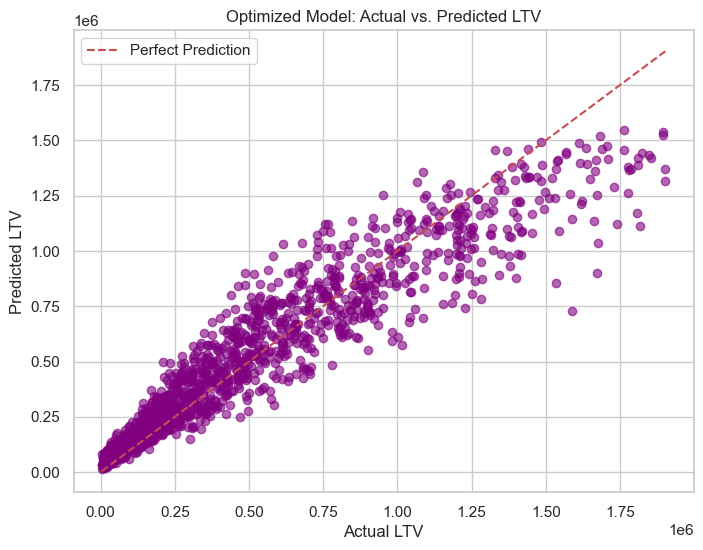

In [545]:
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.6, color='purple')
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Optimized Model: Actual vs. Predicted LTV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.legend()
plt.show()

### --- 9.4. Feature Importance Analysis ---


--- Top 10 Features of the Optimized Model ---


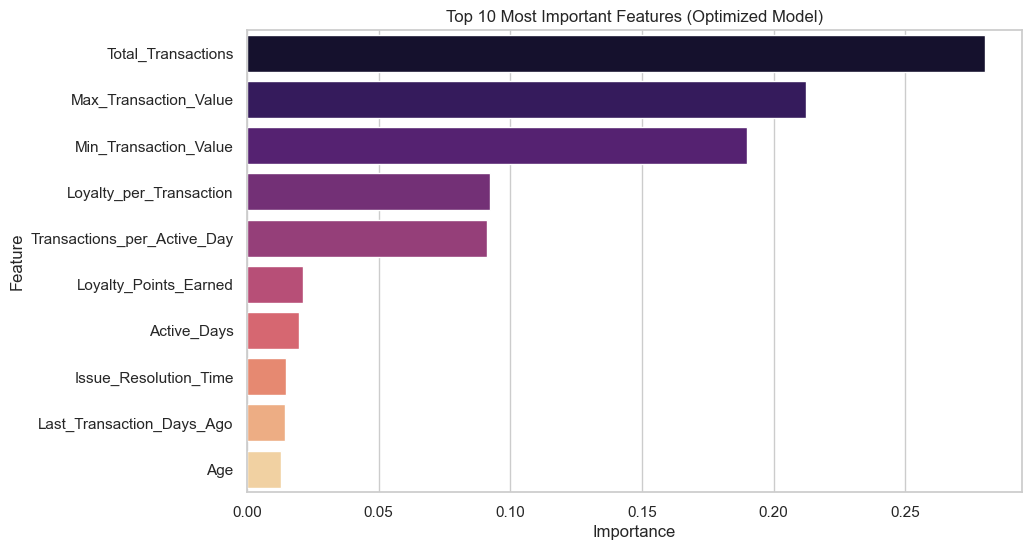

In [548]:
# --- Feature Importance Analysis ---
importances = final_optimized_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Features of the Optimized Model ---")
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='magma')
plt.title("Top 10 Most Important Features (Optimized Model)")
plt.show()

# 10. Model Comparison (Linear Regressor, XGBoost Regressor, Random Forest Regressor)

| Model                   | R²     | RMSE     | MAE     | Note                                      |
|-------------------------|--------|----------|---------|-------------------------------------------|
| Random Forest           | 0.8862 | –        | 104,257 | Highest accuracy, lowest error            |
| XGBoost                 | 0.8639 | 164,200  | 115,396 | Strong performance, tunable & scalable    |
| Linear Regression (Ridge)| 0.7142 | 237,921  | 182,956 | Simple baseline, least accurate          |

>Compared three models—Random Forest, XGBoost, and Ridge Regression—for predicting Customer Lifetime Value.
>__What worked best was Random Forest.It had the highest R² score of 0.88 and the lowest MAE of 104,257.__
> This means it gave the most accurate predictions with minimal error.

__In conclusion, tree-based models, especially Random Forest worked very well, while linear models were too simplistic for this task. Therefore, Random Forest is recommended for production deployment.__